# Analysis of second dataset, namely **Total AAFs per Drug Class as Reported in Sports**

## Imports & Setup


In [1]:
import os
import unicodedata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# to attempt to forcibly remount
# drive.mount("/content/drive", force_remount=True)

# Path to your mounted Drive file
file_path = '/content/drive/My Drive/CAS_Final project/Anti-doping_testing_figures_All data.xlsx'

# Load workbook to get all sheet names
xlsx = pd.ExcelFile(file_path, engine='openpyxl')

Mounted at /content/drive


## Data Cleaning & Preprocessing





In [3]:
# Initialize table number
table_number = 1

# First loop (for displaying initial tables)
for sheet in xlsx.sheet_names[:-1]:
    df = pd.read_excel(file_path, sheet_name=sheet, header=1, skipfooter=2, engine='openpyxl')
    print(f"\n=== Table {table_number}: {sheet} ===")
    display(df)
    table_number += 1  # Increment table number


=== Table 1: 2014 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Alcohol\nP1.,Beta‐ Blockers\nP2.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming,15.0,1.0,7.0,1.0,14.0,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,53
1,Aquatics,Water Polo,3.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,Aquatics,Aquatics,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,Aquatics,Diving,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Archery,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Taekwondo,University,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
211,Ultimate Fight,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
212,VA'A,Outrigger (Sprint),NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3
213,Weightlifting,University,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1



=== Table 2: 2015 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Alcohol\nP1.,Beta‐ Blockers\nP2.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming,13,‐,4,2,1,6,‐,3,3,‐,‐,‐,‐,32
1,Aquatics,Swimming Sprint 100m or less,‐,‐,4,‐,2,2,‐,‐,1,‐,‐,‐,‐,9
2,Aquatics,Water Polo,2,‐,1,‐,‐,3,‐,1,‐,‐,‐,‐,‐,7
3,Aquatics,Diving,‐,‐,‐,‐,‐,3,‐,‐,1,‐,‐,‐,‐,4
4,Aquatics,Open Water,‐,‐,‐,‐,‐,1,‐,‐,3,‐,‐,‐,‐,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Skiing,University Cross Country,1,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,1
237,Strongman,‐,‐,‐,‐,‐,1,‐,‐,‐,‐,‐,‐,‐,‐,1
238,VA'A,Outrigger (Sprint),‐,‐,‐,‐,‐,‐,‐,3,‐,‐,‐,‐,‐,3
239,Volleyball,Professional Volleyball,‐,‐,‐,‐,‐,2,‐,‐,‐,‐,‐,‐,‐,2



=== Table 3: 2016 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Alcohol\nP1.,Beta‐ Blockers\nP2.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,1,2,7,14,1,10,‐,‐,2,‐,‐,‐,‐,37
1,Aquatics,Water Polo,19,1,‐,8,‐,3,‐,3,1,‐,‐,‐,‐,35
2,Aquatics,Swimming,9,‐,7,5,10,3,‐,‐,3,‐,‐,‐,‐,37
3,Aquatics,Swimming Middle Distance 200‐400m,4,1,2,8,2,5,‐,‐,1,‐,‐,‐,‐,23
4,Aquatics,Swimming Long Distance 800m or greater,1,1,3,2,‐,2,‐,‐,‐,‐,‐,‐,‐,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Skyrunning,‐,‐,‐,‐,‐,‐,1,‐,‐,‐,‐,‐,‐,‐,1
249,Surfing,Wind Surfing,3,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,3
250,Traditional Archery,‐,2,‐,‐,1,‐,‐,‐,‐,‐,‐,‐,‐,‐,3
251,Ultimate Fighting,‐,2,‐,‐,1,‐,‐,1,‐,‐,‐,‐,‐,‐,4



=== Table 4: 2017 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Alcohol\nP1.,Beta‐ Blockers\nP2.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,19,‐,6,1,1,7,‐,‐,2,‐,‐,‐,‐,36
1,Aquatics,Swimming Middle Distance 200‐400m,5,‐,1,1,5,2,‐,‐,2,‐,‐,‐,‐,16
2,Aquatics,Open Water,3,1,‐,‐,1,4,‐,‐,‐,‐,‐,‐,‐,9
3,Aquatics,Water Polo,2,‐,‐,2,‐,1,‐,1,‐,‐,‐,‐,‐,6
4,Aquatics,Diving,2,‐,‐,‐,‐,3,‐,‐,‐,‐,‐,‐,‐,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Traditional Archery,Traditional Archery,‐,‐,‐,‐,2,‐,‐,‐,‐,‐,‐,‐,‐,2
304,Ultimate Fighting,Ultimate Fighting,‐,‐,‐,1,1,1,‐,‐,‐,‐,‐,‐,‐,3
305,VA'A,Outrigger (Sprint),1,‐,‐,‐,‐,‐,‐,‐,2,‐,‐,‐,‐,3
306,Volleyball,Military Volleyball,‐,‐,‐,‐,‐,‐,‐,‐,2,‐,‐,‐,‐,2



=== Table 5: 2018 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,8,‐,6,4,‐,14,‐,1,2,‐,‐,‐,35
1,Aquatics,Swimming Middle Distance 200‐400m,11,1,1,2,2,6,‐,‐,5,‐,‐,‐,28
2,Aquatics,Water Polo,2,‐,‐,‐,3,6,‐,‐,‐,‐,‐,‐,11
3,Aquatics,Swimming Long Distance 800m or greater,2,‐,2,1,‐,‐,‐,‐,‐,‐,‐,‐,5
4,Aquatics,Open Water,‐,‐,1,1,1,‐,‐,‐,‐,‐,‐,‐,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,VA'A,Outrigger (Sprint),1,‐,‐,‐,‐,‐,‐,1,‐,‐,‐,‐,2
273,Volleyball,Professional Volleyball,‐,‐,‐,‐,‐,‐,‐,‐,2,‐,‐,‐,2
274,Volleyball,University Volleyball,1,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,‐,1
275,Wrestling,University,1,‐,‐,‐,‐,1,‐,‐,‐,‐,‐,‐,2



=== Table 6: 2019 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,9,-,4,1,4,16,-,2,-,-,-,-,36
1,Aquatics,Swimming Middle Distance 200-400m,10,-,2,-,3,7,-,-,2,-,-,-,24
2,Aquatics,Swimming Long Distance 800m or greater,3,1,1,-,-,4,-,-,-,-,-,-,9
3,Aquatics,Water Polo,-,-,1,-,1,2,-,1,1,-,-,-,6
4,Aquatics,Artistic Swimming,-,-,-,-,3,-,-,-,-,-,-,-,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Traditional Archery,-,-,-,-,-,-,-,-,-,-,1,-,-,1
255,VA'A,Outrigger (Sprint),-,-,-,-,-,-,-,1,-,-,-,-,1
256,Volleyball,Professional Volleyball,-,-,-,-,-,-,-,-,4,-,-,-,4
257,Volleyball,College,-,-,-,-,-,1,-,-,-,-,-,-,1



=== Table 7: 2020 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐ steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,2,-,1,1,-,9,-,-,2,-,-,-,15
1,Aquatics,Swimming Middle Distance 200-400m,1,-,2,1,-,5,-,-,-,-,-,-,9
2,Aquatics,Water Polo,-,-,-,-,-,1,-,2,-,-,-,-,3
3,Aquatics,Diving,-,-,-,-,-,1,-,-,-,-,-,-,1
4,Aquatics,Swimming Long Distance 800m or greater,-,-,-,-,-,1,-,-,-,-,-,-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Gaelic Games,Football,-,-,-,1,-,-,-,-,-,-,-,-,1
165,Golf,Professional Golf (R),-,-,-,-,3,-,-,-,-,-,-,-,3
166,Kabaddi,Kabaddi (R),12,-,-,1,-,3,-,-,-,-,-,-,16
167,Mixed Martial Arts,Mixed Martial Arts (R),64,1,2,9,10,3,-,4,-,-,-,-,93



=== Table 8: 2021 ===


,Sports,Discipline,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,8,-,3,11,-,17,-,1,-,-,-,-,40
1,Aquatics,Swimming Middle Distance 200-400m,2,2,5,14,3,6,-,-,-,-,-,-,32
2,Aquatics,Swimming Long Distance 800m or greater,1,-,-,6,-,1,-,-,2,-,-,-,10
3,Aquatics,Water Polo,-,-,-,2,-,1,-,-,-,-,-,-,3
4,Aquatics,Open Water,-,-,1,-,1,1,-,-,-,-,-,-,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Ice Hockey,University,-,-,-,-,-,1,-,-,-,-,-,-,1
194,Rugby,University Sevens,-,-,-,-,-,3,-,-,-,-,-,-,3
195,Athletics,Ultra Trail,-,-,-,-,-,1,-,-,4,-,-,-,5
196,Athletics,Short Trail,-,-,-,-,-,-,-,1,-,-,-,-,1



=== Table 9: 2022 ===


,Sports,Discipline,Anabolic Agents\nS1.1,Other Anabolic Agents\nS1.2,"Peptide Hormones, Growth Factors, Related Substances and Mimetics\nS2.",Beta-2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aquatics,Swimming Sprint 100m or less,12,4,-,1,4,2,9,-,-,-,-,-,-,32
1,Aquatics,Swimming Middle Distance 200-400m,-,-,-,1,5,6,7,-,-,-,-,-,-,19
2,Aquatics,Water Polo,-,-,-,-,1,2,4,-,-,-,-,-,-,7
3,Aquatics,Diving,-,-,-,-,-,1,2,-,1,-,-,-,-,4
4,Aquatics,Swimming Long Distance 800m or greater,1,-,-,2,-,-,1,-,-,-,-,-,-,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Athletics,University Middle Distance 800-1500m,-,-,-,-,-,2,1,-,-,-,-,-,-,3
223,Athletics,University Throws,-,-,-,-,-,-,1,-,-,-,-,-,-,1
224,Ice Hockey,University,-,-,-,-,-,-,2,-,-,-,-,-,-,2
225,Rugby Union,University Fifteens,-,-,-,-,-,-,2,-,-,-,-,-,-,2


In [4]:
# Dictionary to store each sheet's processed DataFrame
tables = {}

# Loop through every sheet except the last one
# Second loop (for processing and displaying processed tables)
tables = {}
for sheet in xlsx.sheet_names[:-1]:

    # --- A) Read title & data fresh each time ---
    title = (
        pd.read_excel(
            file_path,
            sheet_name=sheet,
            header=None,
            nrows=1,
            engine='openpyxl'
        )
        .iloc[0, 0]
    )
    df = pd.read_excel(
        file_path,
        sheet_name=sheet,
        header=1,
        skipfooter=2,
        engine='openpyxl'
    )

    # --- B) Identify your "sport" column ---
    sport_col = df.columns[0]

    # --- C) If it was a stray index, drop it ---
    if sport_col is None or str(sport_col).isdigit() or str(sport_col).startswith('Unnamed'):
        df = df.iloc[:, 1:]
        sport_col = df.columns[0]

    # --- Custom adjustments by sheet ---
    if str(sheet) == '2022':
        # Merge columns 2 and 3 into new column at position 2
        col_a = df.columns[2]
        col_b = df.columns[3]
        new_col = 'Anabolic Agents\nS1.'
        # Convert to numeric then sum
        a_vals = pd.to_numeric(df[col_a].replace('-', pd.NA), errors='coerce').fillna(0).astype(int)
        b_vals = pd.to_numeric(df[col_b].replace('-', pd.NA), errors='coerce').fillna(0).astype(int)
        df[new_col] = a_vals + b_vals
        # Drop original columns
        df = df.drop([col_a, col_b], axis=1)
        # Reorder so new column is second
        cols = list(df.columns)
        cols.insert(2, cols.pop(cols.index(new_col)))
        df = df[cols]
        # Rename the 4th column to S2 title
        if len(df.columns) >= 4:
            df.rename(columns={df.columns[3]: 'Peptide Hormones, Growth Factors and Related Substances\nS2.'}, inplace=True)

    # Remove 12th column for older sheets
    if str(sheet) in ['2014', '2015', '2016', '2017']:
        if len(df.columns) >= 12:
            df = df.drop(df.columns[11], axis=1)

    # --- D) Drop the 2nd column entirely ---
    df = df.drop(df.columns[1], axis=1)

    # --- E) Coerce all remaining data columns to ints ---
    data_cols = df.columns.drop(sport_col)
    df[data_cols] = (
        df[data_cols]
          .replace('-', pd.NA)               # dashes → NA
          .apply(pd.to_numeric, errors='coerce')
          .fillna(0)
          .astype(int)
    )

    # --- F) Normalize the sport names so grouping will catch typos/spaces ---
    df[sport_col] = (
        df[sport_col]
          .astype(str)
          .apply(lambda x: unicodedata.normalize('NFKC', x))  # fix weird spaces
          .str.strip()                                        # trim ends
          .str.replace(r'\s+', ' ', regex=True)               # collapse multi-spaces
          .str.title()                                        # unify casing
          .str.replace('‐', '-', regex=True)                  # Replace special hyphen with regular hyphen
    )

    # --- G) Group on sport_col and sum only the numeric columns back in ---
    df = (
        df
        .groupby(sport_col, as_index=False)[list(data_cols)]
        .sum()
    )

    # --- Rename columns (2 to 13) ---
    desired_columns = [
        "Anabolic Agents\nS1.",
        "Peptide Hormones, Growth Factors and Related Substances\nS2.",
        "Beta‐2 Agonists\nS3.",
        "Hormone and Metabolic Modulators\nS4.",
        "Diuretics and Other Masking Agents\nS5.",
        "Stimulants\nS6.",
        "Narcotics\nS7.",
        "Cannabinoids\nS8.",
        "Glucocortico‐steroids\nS9.",
        "Beta-Blockers\nP1.",
        "Enhancement of Oxygen Transfer\nM1.",
        "Chemical and Physical Manipulation\nM2."
    ]

    # Get the current column names (excluding the first column which is the sport)
    current_columns = df.columns[1:]

    # Rename the columns, handling potential length differences
    num_cols_to_rename = min(len(current_columns), len(desired_columns))
    rename_dict = {current_columns[i]: desired_columns[i] for i in range(num_cols_to_rename)}
    df = df.rename(columns=rename_dict)

    # Store processed DataFrame
    tables[sheet] = df

# --- H) Show title + first/last 5 rows ---
    print(f"\n=== Table {table_number}: {title} ===")
    display(df)
    table_number += 1  # Increment table number

# Now each sheet's DataFrame is accessible via tables['2014'], tables['2022'], etc.


=== Table 10: 2014 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,American Football,7,1,2,0,2,3,3,2,2,0,0,0,22
1,Aquatics,21,1,7,1,18,23,0,0,8,0,0,0,79
2,Archery,1,0,0,0,6,5,0,0,0,2,0,0,14
3,Arm Wrestling,26,0,0,0,3,4,0,0,0,0,0,0,33
4,Athletics,171,26,15,9,24,42,4,2,28,0,0,1,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Va'A,0,0,1,0,0,0,1,1,0,0,0,0,3
95,Volleyball,5,0,2,0,1,5,0,2,0,0,0,0,15
96,Weightlifting,152,1,3,10,32,15,0,2,8,0,0,0,223
97,Wrestling,44,0,2,3,18,5,0,2,1,0,0,0,75



=== Table 11: 2015 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Air Sports,1,0,0,0,3,0,0,0,0,0,0,0,4
1,American Football,19,0,5,0,1,6,0,3,0,0,0,0,34
2,Aquatics,17,0,10,3,6,16,0,4,8,0,0,0,64
3,Archery,4,0,0,1,2,3,0,0,0,2,0,0,12
4,Arm Wrestling,25,1,0,1,3,1,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Volleyball,11,0,0,0,2,11,0,4,2,0,0,0,30
92,Waterskiing,1,0,0,0,0,1,0,0,0,0,0,0,2
93,Weightlifting,262,8,0,15,18,23,2,2,4,0,0,0,334
94,Wrestling,31,2,0,1,17,14,0,1,5,0,0,0,71



=== Table 12: 2016 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Air Sports,0,0,0,0,0,0,0,1,0,0,0,0,1
1,American Football,39,1,6,1,3,28,0,3,0,0,0,0,81
2,Aquatics,40,5,21,38,14,33,0,4,11,0,0,0,166
3,Archery,2,0,0,0,8,4,0,0,0,5,0,0,19
4,Arm Wrestling,1,0,0,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Volleyball,21,0,0,5,3,3,0,1,2,0,0,0,35
103,Waterskiing,0,0,0,0,0,0,0,1,0,0,0,0,1
104,Weightlifting,111,5,6,42,11,20,0,2,4,0,0,0,201
105,Wrestling,56,1,2,68,21,7,1,2,0,0,0,0,158



=== Table 13: 2017 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Aikido,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air Sports,0,0,1,0,1,0,0,0,0,0,0,0,2
2,American Football,15,1,2,5,1,16,0,7,1,0,0,0,48
3,Aquatics,36,1,8,6,9,22,1,1,4,0,0,0,88
4,Archery,0,0,0,0,2,1,0,0,0,6,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Volleyball,11,0,3,1,3,5,0,1,4,0,0,0,28
128,Waterskiing,3,0,0,0,0,1,0,0,0,0,0,0,4
129,Weightlifting,129,3,8,12,25,23,1,2,3,0,0,0,206
130,Wrestling,46,2,4,13,18,15,0,6,3,0,0,0,107



=== Table 14: 2018 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Air Sports,1,0,0,0,1,2,0,0,1,0,0,0,5
1,American Football,34,0,5,2,0,14,0,10,5,0,0,0,70
2,Aquatics,24,1,10,8,9,26,0,1,7,0,0,0,86
3,Archery,1,0,0,0,13,0,0,1,0,3,0,0,18
4,Arm Wrestling,29,0,0,1,3,5,0,0,0,0,0,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Volleyball,17,1,3,2,0,10,0,5,7,0,0,0,45
111,Waterskiing,1,0,0,0,0,2,0,0,2,0,0,0,5
112,Weightlifting,143,4,4,18,14,34,0,5,12,0,0,0,234
113,Wrestling,55,0,1,11,17,13,0,1,0,0,0,0,98



=== Table 15: 2019 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,Air Sports,31,2,1,3,3,0,0,0,0,0,0,0,40
1,American Football,12,0,2,3,0,14,0,10,1,0,0,0,42
2,Aquatics,23,2,9,2,12,31,0,3,3,0,0,0,85
3,Archery,0,0,1,0,2,0,1,0,1,3,0,0,8
4,Arm Wrestling,14,0,0,4,8,4,0,1,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Volleyball,14,0,0,0,4,6,1,3,7,0,0,0,35
111,Waterskiing,1,0,0,0,5,0,0,1,0,0,0,0,7
112,Weightlifting,142,7,3,31,16,41,2,5,10,0,0,0,257
113,Wrestling,44,1,3,16,17,24,3,6,1,0,0,0,115



=== Table 16: 2020 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,American Football,2,0,3,0,1,1,1,1,0,0,0,0,9
1,Aquatics,3,0,4,2,0,17,0,2,2,0,0,0,30
2,Archery,1,0,0,0,1,3,0,0,0,1,0,0,6
3,Arm Wrestling,2,0,0,0,0,0,0,0,0,0,0,0,2
4,Athletics,58,7,7,8,12,31,0,2,8,0,0,0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Underwater Sports,0,0,0,0,3,0,0,0,0,8,0,0,11
71,Volleyball,5,0,1,1,0,10,1,3,1,0,0,0,22
72,Weightlifting,81,2,6,10,7,15,0,2,0,0,0,0,123
73,Wrestling,40,2,2,8,8,6,0,3,1,0,0,0,70



=== Table 17: 2021 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,American Football,6,0,0,0,0,7,0,3,1,0,0,0,17
1,Aquatics,11,2,9,33,6,26,0,1,2,0,0,0,90
2,Archery,5,0,0,0,10,2,0,0,1,5,0,0,23
3,Arm Wrestling,20,0,0,1,4,1,0,1,0,0,0,0,27
4,Athletics,97,31,5,23,13,23,2,6,20,0,4,0,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Volleyball,7,0,0,4,3,2,0,4,2,0,0,0,22
87,Waterskiing,0,0,0,0,1,0,0,1,0,0,0,0,2
88,Weightlifting,77,5,2,16,13,14,1,3,5,0,0,0,136
89,Wrestling,42,4,2,10,8,9,1,2,2,0,0,0,80



=== Table 18: 2022 - Total AAFs* per Drug Class as Reported in Sports ===


,Sports,Anabolic Agents\nS1.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Beta‐2 Agonists\nS3.,Hormone and Metabolic Modulators\nS4.,Diuretics and Other Masking Agents\nS5.,Stimulants\nS6.,Narcotics\nS7.,Cannabinoids\nS8.,Glucocortico‐steroids\nS9.,Beta-Blockers\nP1.,Enhancement of Oxygen Transfer\nM1.,Chemical and Physical Manipulation\nM2.,Total
0,American Football,10,1,1,1,2,8,0,6,0,0,0,0,29
1,Aquatics,19,0,4,11,16,25,0,1,0,0,0,0,76
2,Archery,0,0,2,1,6,1,0,2,0,3,0,0,15
3,Arm Wrestling,29,0,0,5,7,3,1,0,0,0,0,0,45
4,Athletics,134,50,12,33,18,42,1,2,13,0,0,0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Volleyball,3,0,0,2,3,2,0,4,1,0,0,0,15
97,Waterskiing,0,0,1,0,0,0,0,1,0,0,0,0,2
98,Weightlifting,136,6,6,18,14,28,0,6,3,0,0,0,217
99,Wrestling,53,4,0,10,10,19,1,4,1,0,0,0,102


In [5]:
# Container for each sheet's sports
sports_by_sheet = {}

# Loop through all but the last sheet
for sheet in xlsx.sheet_names[:-1]:
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet, header=1, skipfooter=2, engine='openpyxl')

    # Normalize the sport column
    sport_col = df.columns[0]
    sports = (
        df[sport_col]
        .astype(str)
        .apply(lambda x: unicodedata.normalize('NFKC', x))
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.title()
        .str.replace('‐', '-', regex=True)  # Replace special hyphen
        .str.replace(r'\(R\)', '', regex=True)
        .apply(lambda x: x.replace('Jiu-Jitsu', 'Brazilian Jiu-Jitsu'))
        .apply(lambda x: x.replace('BrazilianJiu-Jitsu', 'Brazilian Jiu-Jitsu'))
        .apply(lambda x: x.replace('Brazilian Brazilian Jiu-Jitsu', 'Brazilian Jiu-Jitsu'))
        .apply(lambda x: x.replace('Ski-Mountaineering', 'Ski Mountaineering') if sheet == '2014' else x)
        .unique()
        .tolist()
    )
    # Store the sports for the current sheet
    sports_by_sheet[sheet] = sports

# Create a list to store the data for the DataFrame
table_data = []

# Loop through each sheet's sports and total
for sheet, sports in sports_by_sheet.items():
    for sport in sorted(sports):
        table_data.append([sheet, sport])

# Create a Pandas DataFrame from the table data
df_sports = pd.DataFrame(table_data, columns=['Year', 'Sport'])

# Pivot the DataFrame to have years as columns
df_sports_pivot = df_sports.pivot(index='Sport', columns='Year', values='Sport')

# Replace NaN values with empty strings (instead of False)
df_sports_pivot = df_sports_pivot.fillna('')  # Replace NaNs with the name of the sport

# --- Remove the first column (sport names) ---
df_sports_pivot = df_sports_pivot.reset_index(drop=True)

# --- Calculate and add total per year (treating empty as 0) ---
df_sports_pivot.loc['Total'] = (df_sports_pivot != '').sum()  # Count non-empty cells

# --- Naming the table with numbering ---
print(f"\n=== Table {table_number}: Sports analyzed for doping from 2014 to 2022 ===")
table_number += 1  # Increment table number

# Increase display limits
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the pivoted DataFrame
display(df_sports_pivot)


=== Table 19: Sports analyzed for doping from 2014 to 2022 ===


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,,,,Aikido,,,,,
1,,Air Sports,Air Sports,Air Sports,Air Sports,Air Sports,,,
2,American Football,American Football,American Football,American Football,American Football,American Football,American Football,American Football,American Football
3,Aquatics,Aquatics,Aquatics,Aquatics,Aquatics,Aquatics,Aquatics,Aquatics,Aquatics
4,Archery,Archery,Archery,Archery,Archery,Archery,Archery,Archery,Archery
5,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling,Arm Wrestling
6,Athletics,Athletics,Athletics,Athletics,Athletics,Athletics,Athletics,Athletics,Athletics
7,Australian Rules Foot,,,,,,,,
8,,Australian Rules Football,Australian Rules Football,Australian Rules Football,Australian Rules Football,Australian Rules Football,,Australian Rules Football,
9,Automobile,,,,,,,,


## Exploratory Data Analysis

In [6]:
import unicodedata

def normalize_sport(s):
    return (
        unicodedata.normalize('NFKC', s)
        .replace('‐', '-')      # dash variants
        .replace('–', '-')
        .replace('\u200b', '')  # zero-width space
        .replace('  ', ' ')     # double spaces to single
        .strip()
        .title()
    )

billiards_variants = {"billiards sports"}

sport_sets = []
for lst in sports_by_sheet.values():
    normed = [normalize_sport(s) for s in lst]
    filtered = [s for s in normed if s.lower() not in billiards_variants]
    sport_sets.append(set(filtered))

common_sports = set.intersection(*sport_sets)
common_sports_list = sorted(common_sports)

print("Sports appearing in every sheet (excluding Billiards Sports):")
for sport in common_sports_list:
    print(f" - {sport}")

print(f"\nTotal sports (excluding Billiards Sports): {len(common_sports_list)}")




Sports appearing in every sheet (excluding Billiards Sports):
 - American Football
 - Aquatics
 - Archery
 - Arm Wrestling
 - Athletics
 - Badminton
 - Basketball
 - Biathlon
 - Bodybuilding
 - Boules Sports
 - Boxing
 - Cricket
 - Cycling
 - Equestrian
 - Fencing
 - Field Hockey
 - Floorball
 - Football
 - Goalball
 - Golf
 - Gymnastics
 - Handball
 - Ice Hockey
 - Judo
 - Kabaddi
 - Karate
 - Kickboxing
 - Muaythai
 - Powerboating
 - Powerlifting
 - Roller Sports
 - Rowing
 - Sambo
 - Shooting
 - Skating
 - Skiing
 - Squash
 - Table Tennis
 - Taekwondo
 - Tennis
 - Triathlon
 - Underwater Sports
 - Volleyball
 - Weightlifting
 - Wrestling
 - Wushu

Total sports (excluding Billiards Sports): 46


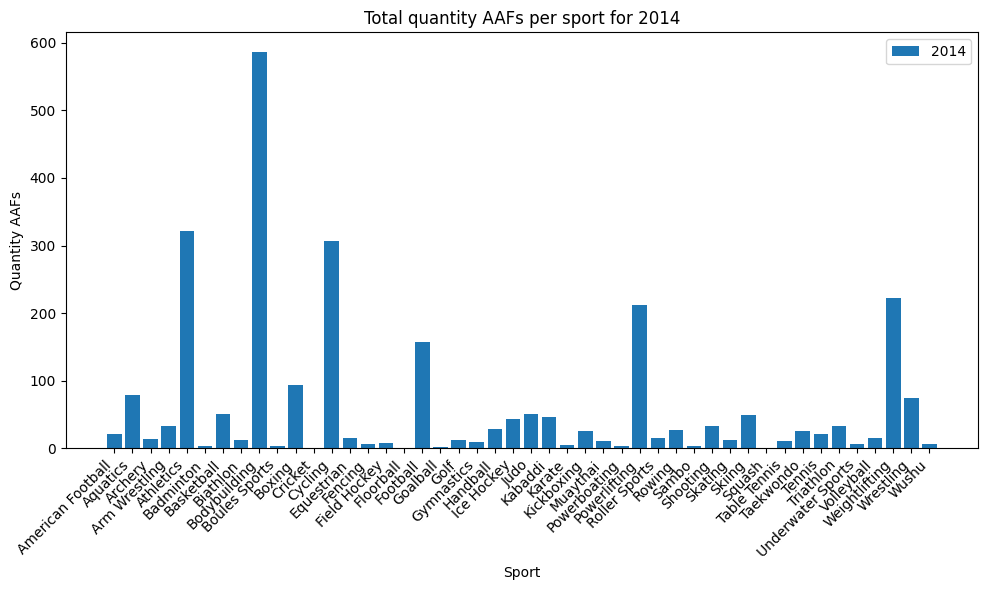

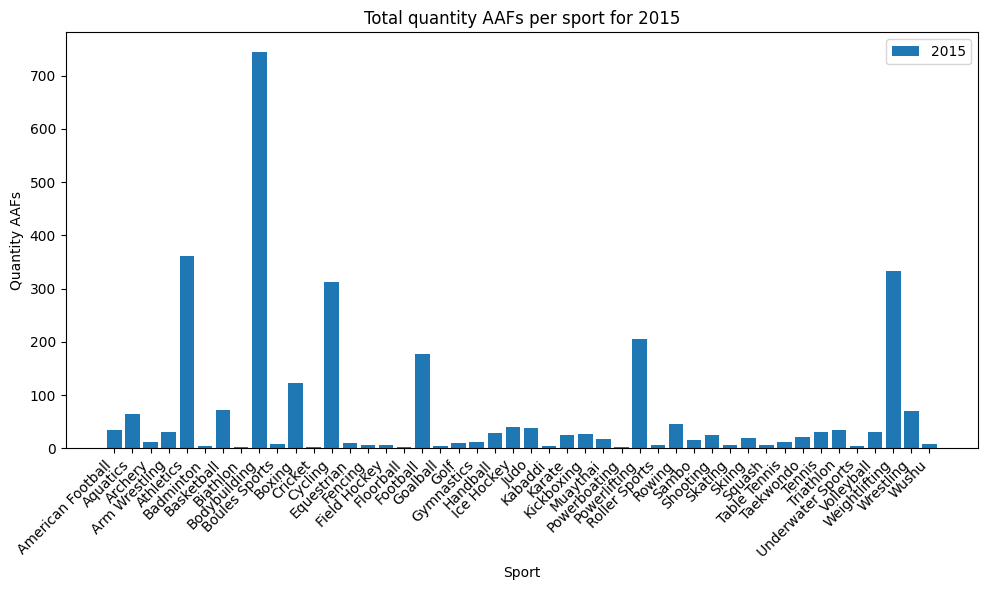

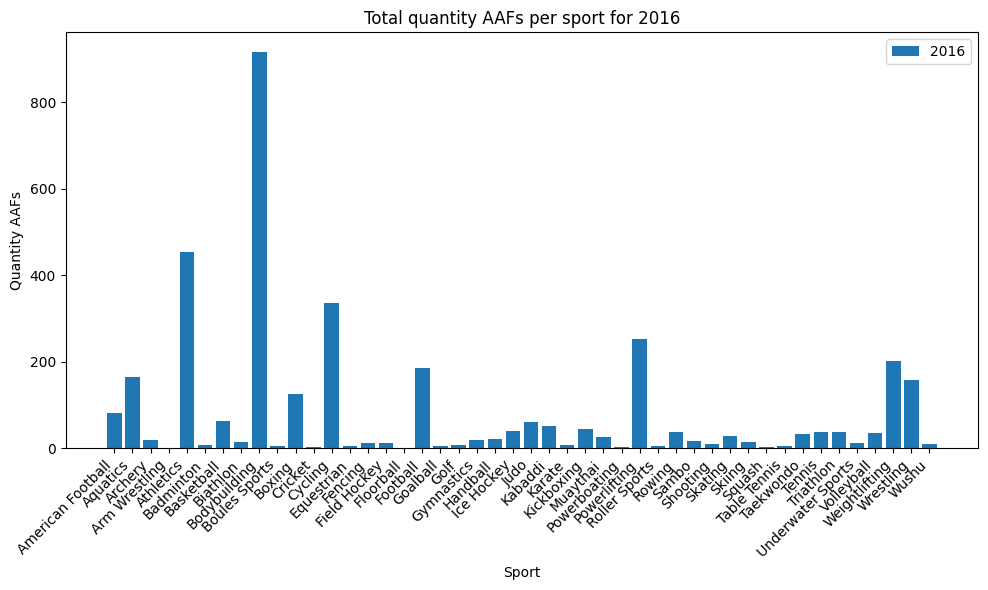

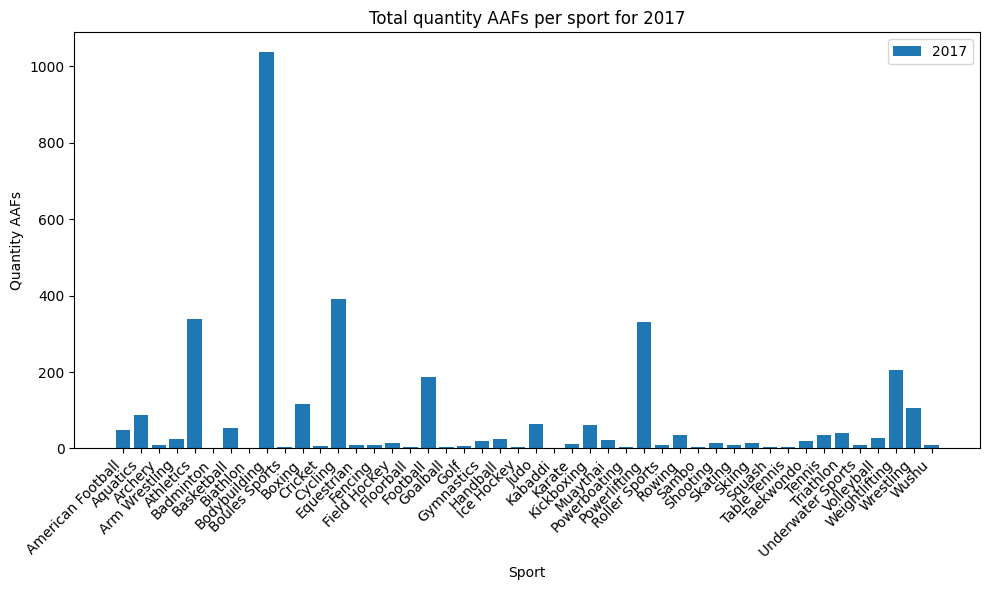

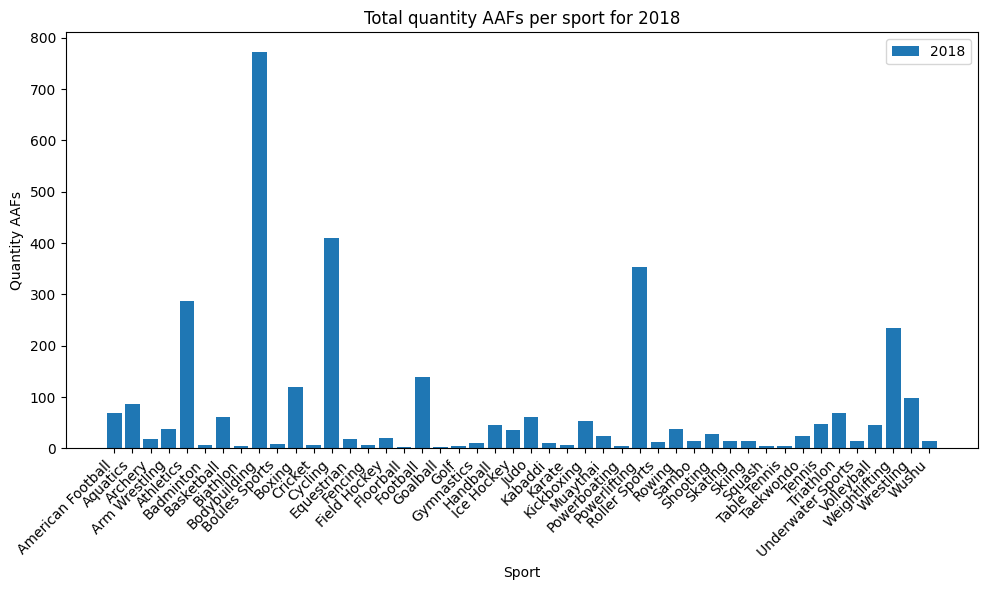

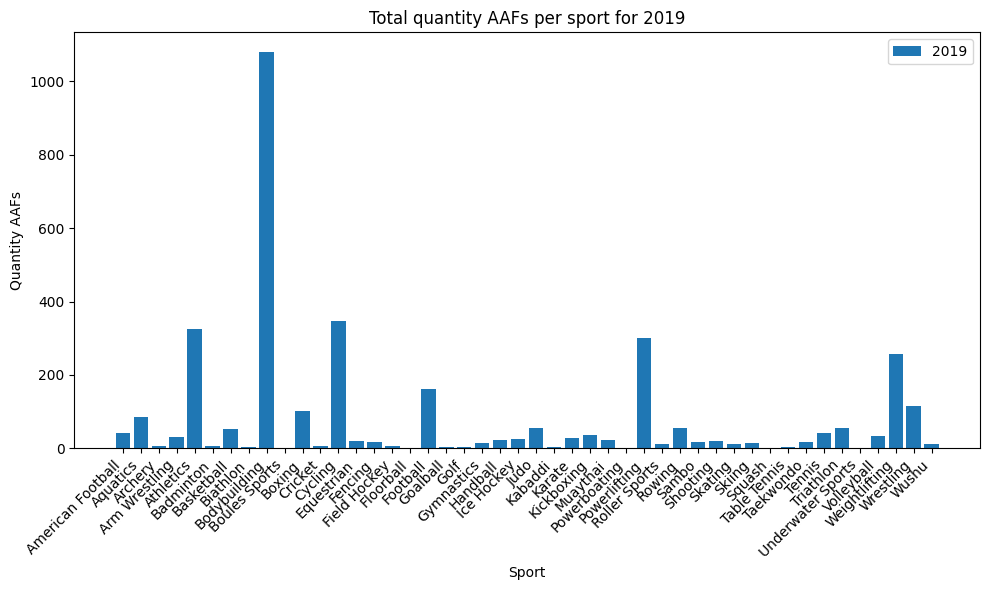

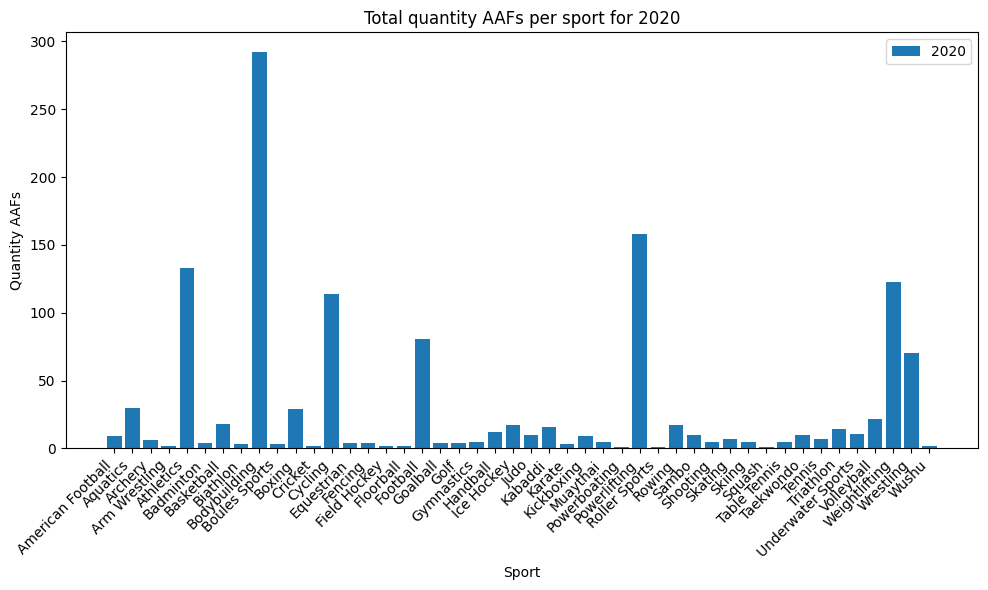

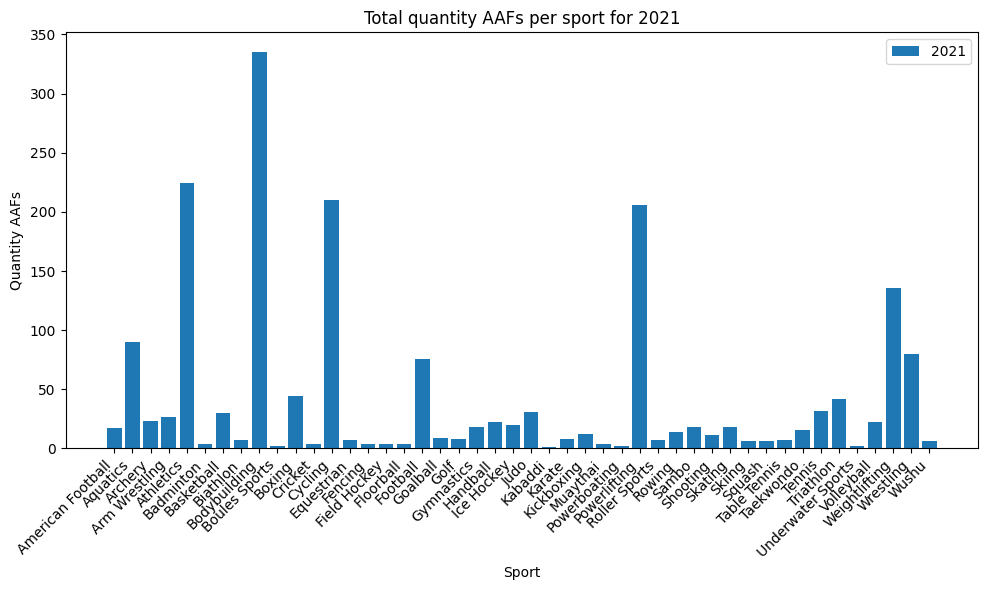

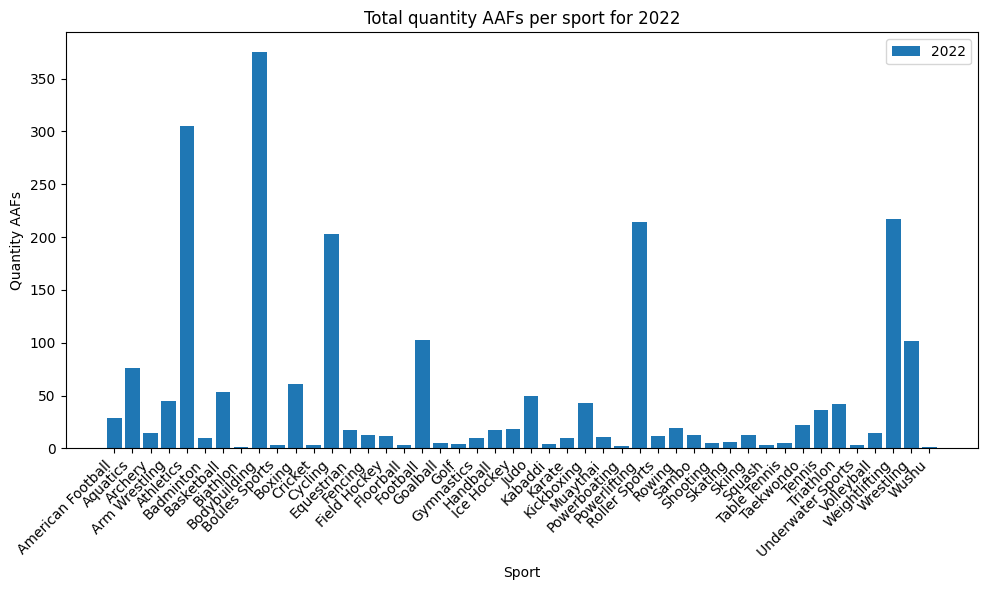

In [7]:
# @title
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata

for sheet, df in tables.items():
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Filter data for common sports in the current sheet
    filtered_df = df[df[df.columns[0]].isin(common_sports)]

    # Extract data for the bar chart
    sports = filtered_df[filtered_df.columns[0]].values

    # Get the last column (Total)
    quantities = filtered_df[filtered_df.columns[-1]].values

    # Create the bar chart
    plt.bar(sports, quantities, label=sheet)

    plt.xlabel("Sport")  # Set the x-axis label
    plt.ylabel("Quantity AAFs")  # Set the y-axis label
    plt.title(f"Total quantity AAFs per sport for {sheet}")  # Set title
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend()  # Show the legend
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Specify desired columns if not already defined
if 'desired_columns' not in globals():
    desired_columns = tables['2014'].columns[1:13]

# Create a histogram for each sport in common_sports
for sport in common_sports:
    plt.figure(figsize=(10, 6))
    all_years_data = {}
    for sheet, df in tables.items():
        filtered_df = df[df[df.columns[0]] == sport]
        if not filtered_df.empty:
            # Find common columns
            cols_to_use = list(set(desired_columns) & set(filtered_df.columns))
            column_data = filtered_df[cols_to_use].values.flatten()

            # Pad or truncate as needed
            num_desired_cols = len(desired_columns)
            if len(column_data) < num_desired_cols:
                column_data = np.pad(column_data, (0, num_desired_cols - len(column_data)), 'constant', constant_values=0)
            else:
                column_data = column_data[:num_desired_cols]

            all_years_data[sheet] = column_data

    x_pos = np.arange(len(desired_columns))
    width = 0.8 / len(tables)
    colors = plt.get_cmap('viridis', len(tables))

    for i, (sheet, column_data) in enumerate(all_years_data.items()):
        plt.bar(x_pos + i * width, column_data, width=width, label=sheet, color=colors(i))

    plt.xlabel("All doping methods")
    plt.ylabel("Quantity")
    plt.title(f"{sport}")
    plt.xticks(x_pos + width * (len(tables) - 1) / 2, desired_columns, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Machine Learning

### Unsupervised Clustering & Dimensionality Reduction of Doping Profiles

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


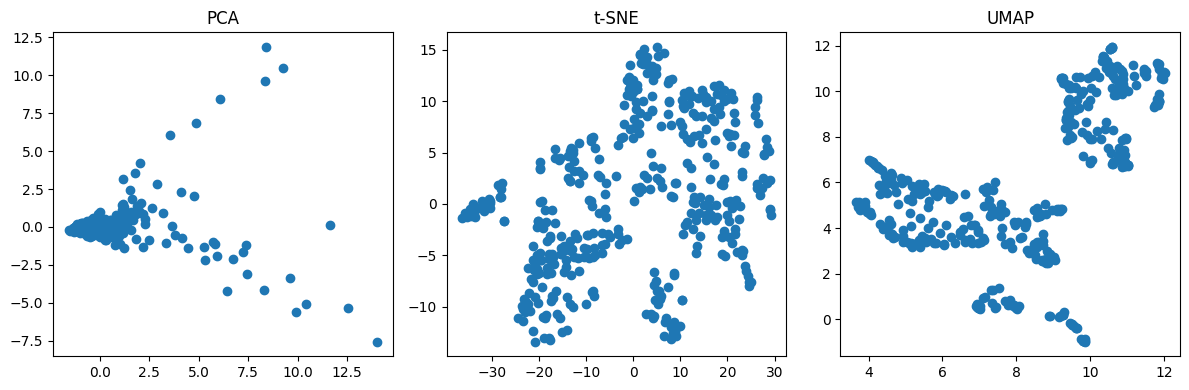

In [9]:
# prompt: Unsupervised Clustering & Dimensionality Reduction
# Goal: Discover groups of sports with similar doping profiles
# Feature Matrix: For each sport, aggregate its per-class percentages (e.g. S1–M1 counts normalized by total).
# Methods:
# PCA / t-SNE / UMAP for 2D visualization of sport “doping fingerprints.”
# K-means & Hierarchical Clustering to segment sports into clusters (e.g. “stimulant-heavy” vs. “anabolic-heavy”).

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Concatenate data for all common sports across all years
all_sports_data = []
sport_names = []

for sport in common_sports:
    for sheet, df in tables.items():
        filtered_df = df[df[df.columns[0]] == sport]
        if not filtered_df.empty:
            all_sports_data.append(filtered_df.iloc[:, 1:-1].values.flatten())
            sport_names.append(f"{sport}_{sheet}")

# Pad to uniform length
max_len = max(len(data) for data in all_sports_data)
padded_data = [np.pad(data, (0, max_len - len(data)), 'constant') for data in all_sports_data]
X = np.array(padded_data)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
pca_result = PCA(n_components=2).fit_transform(X_scaled)
tsne_result = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)

# Visualization: PCA, t-SNE, UMAP
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA")

plt.subplot(1, 3, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE")

plt.subplot(1, 3, 3)
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title("UMAP")

plt.tight_layout()
plt.show()




Silhouette Score (KMeans on X_scaled): 0.74
Silhouette Score (Hierarchical on X_scaled): 0.50


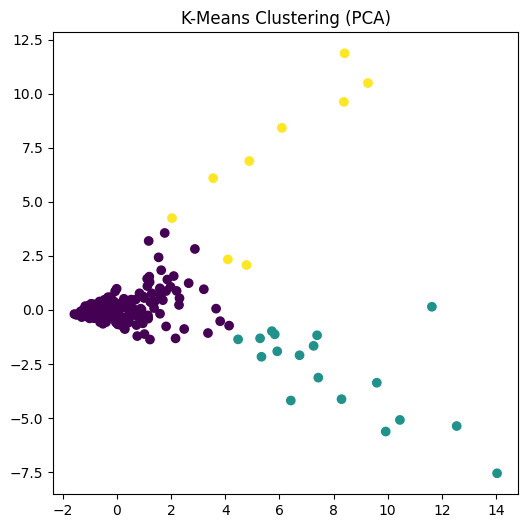

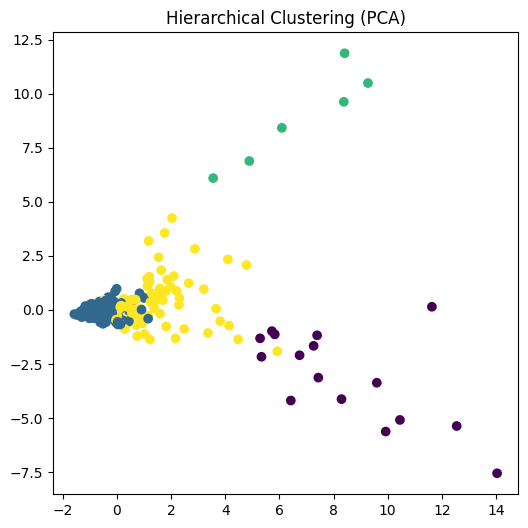

In [10]:
from sklearn.metrics import silhouette_score

# ===========================
# Clustering (on standardized data)
# ===========================
kmeans_labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)
hierarchical_labels = AgglomerativeClustering(n_clusters=4).fit_predict(X_scaled)

# Evaluate Silhouette Scores
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
sil_hier = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score (KMeans on X_scaled): {sil_kmeans:.2f}")
print(f"Silhouette Score (Hierarchical on X_scaled): {sil_hier:.2f}")

# ===========================
# Visualize clusters (on PCA)
# ===========================
plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA)")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering (PCA)")
plt.show()


Silhouette Score (KMeans on UMAP_result): 0.56
Silhouette Score (Hierarchical on UMAP_result): 0.55


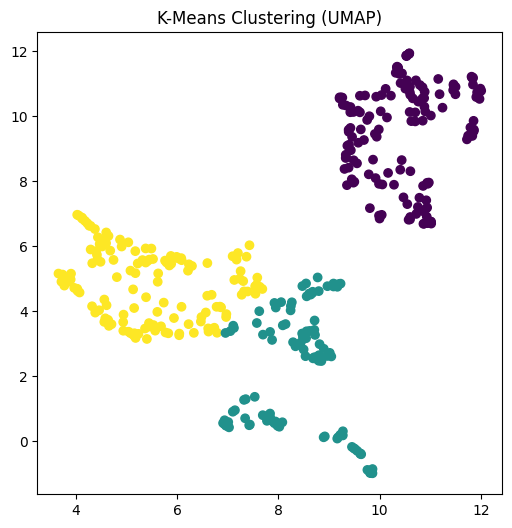

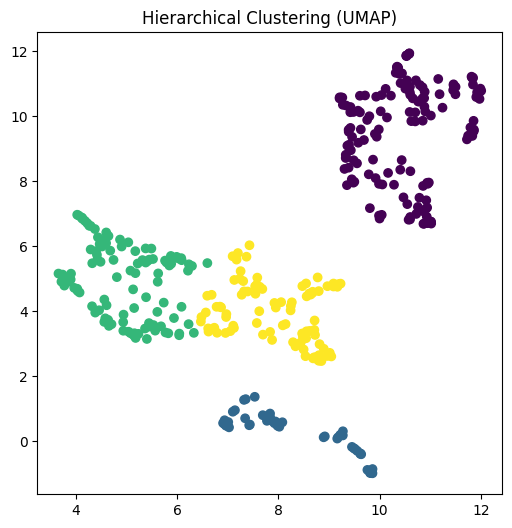

In [11]:
# ===========================
# Clustering (on UMAP data)
# ===========================
kmeans_labels_umap = KMeans(n_clusters=3, random_state=42).fit_predict(umap_result)
hierarchical_labels_umap = AgglomerativeClustering(n_clusters=4).fit_predict(umap_result)

# Evaluate Silhouette Scores
sil_kmeans_umap = silhouette_score(umap_result, kmeans_labels_umap)
sil_hier_umap = silhouette_score(umap_result, hierarchical_labels_umap)
print(f"Silhouette Score (KMeans on UMAP_result): {sil_kmeans_umap:.2f}")
print(f"Silhouette Score (Hierarchical on UMAP_result): {sil_hier_umap:.2f}")

# ===========================
# Visualize clusters (on UMAP)
# ===========================
plt.figure(figsize=(6, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=kmeans_labels_umap, cmap='viridis')
plt.title("K-Means Clustering (UMAP)")
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=hierarchical_labels_umap, cmap='viridis')
plt.title("Hierarchical Clustering (UMAP)")
plt.show()

### Cluster Memberships

In [12]:
from sklearn.metrics import silhouette_score

# ===========================
# CLUSTERING (separately for PCA and UMAP)
# ===========================

# --- On PCA-reduced data ---
kmeans_labels_pca = KMeans(n_clusters=3, random_state=42).fit_predict(pca_result)
hierarchical_labels_pca = AgglomerativeClustering(n_clusters=4).fit_predict(pca_result)

# --- On UMAP-reduced data ---
kmeans_labels_umap = KMeans(n_clusters=3, random_state=42).fit_predict(umap_result)
hierarchical_labels_umap = AgglomerativeClustering(n_clusters=4).fit_predict(umap_result)

# ===========================
# SILHOUETTE SCORES
# ===========================
print("=== Silhouette Scores ===")
print(f"PCA + KMeans:        {silhouette_score(pca_result, kmeans_labels_pca):.2f}")
print(f"PCA + Hierarchical: {silhouette_score(pca_result, hierarchical_labels_pca):.2f}")
print(f"UMAP + KMeans:       {silhouette_score(umap_result, kmeans_labels_umap):.2f}")
print(f"UMAP + Hierarchical: {silhouette_score(umap_result, hierarchical_labels_umap):.2f}")

# ===========================
# CLUSTER ASSIGNMENTS
# ===========================

# --- K-Means (PCA) ---
cluster_assignments_kmeans_pca = {}
for i, label in enumerate(kmeans_labels_pca):
    cluster_assignments_kmeans_pca.setdefault(label, []).append(sport_names[i])
print("\n=== K-Means Clusters (PCA) ===")
for cluster_id, sports in cluster_assignments_kmeans_pca.items():
    print(f"{int(cluster_id)}: {sports}")

# --- K-Means (UMAP) ---
cluster_assignments_kmeans_umap = {}
for i, label in enumerate(kmeans_labels_umap):
    cluster_assignments_kmeans_umap.setdefault(label, []).append(sport_names[i])
print("\n=== K-Means Clusters (UMAP) ===")
for cluster_id, sports in cluster_assignments_kmeans_umap.items():
    print(f"{int(cluster_id)}: {sports}")

# --- Hierarchical (PCA) ---
cluster_assignments_hier_pca = {}
for i, label in enumerate(hierarchical_labels_pca):
    cluster_assignments_hier_pca.setdefault(label, []).append(sport_names[i])
print("\n=== Hierarchical Clusters (PCA) ===")
for cluster_id, sports in cluster_assignments_hier_pca.items():
    print(f"{int(cluster_id)}: {sports}")

# --- Hierarchical (UMAP) ---
cluster_assignments_hier_umap = {}
for i, label in enumerate(hierarchical_labels_umap):
    cluster_assignments_hier_umap.setdefault(label, []).append(sport_names[i])
print("\n=== Hierarchical Clusters (UMAP) ===")
for cluster_id, sports in cluster_assignments_hier_umap.items():
    print(f"{int(cluster_id)}: {sports}")



=== Silhouette Scores ===
PCA + KMeans:        0.83
PCA + Hierarchical: 0.62
UMAP + KMeans:       0.56
UMAP + Hierarchical: 0.55

=== K-Means Clusters (PCA) ===
0: ['Floorball_2014', 'Floorball_2015', 'Floorball_2016', 'Floorball_2017', 'Floorball_2018', 'Floorball_2019', 'Floorball_2020', 'Floorball_2021', 'Floorball_2022', 'Sambo_2014', 'Sambo_2015', 'Sambo_2016', 'Sambo_2017', 'Sambo_2018', 'Sambo_2019', 'Sambo_2020', 'Sambo_2021', 'Sambo_2022', 'Skating_2014', 'Skating_2015', 'Skating_2016', 'Skating_2017', 'Skating_2018', 'Skating_2019', 'Skating_2020', 'Skating_2021', 'Skating_2022', 'Ice Hockey_2014', 'Ice Hockey_2015', 'Ice Hockey_2016', 'Ice Hockey_2017', 'Ice Hockey_2018', 'Ice Hockey_2019', 'Ice Hockey_2020', 'Ice Hockey_2021', 'Ice Hockey_2022', 'Shooting_2014', 'Shooting_2015', 'Shooting_2016', 'Shooting_2017', 'Shooting_2018', 'Shooting_2019', 'Shooting_2020', 'Shooting_2021', 'Shooting_2022', 'Underwater Sports_2014', 'Underwater Sports_2015', 'Underwater Sports_2016', '

### Silhouette Analysis

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

k_range = range(2, 7)

# =============================
# Silhouette Scores on PCA
# =============================
silhouette_scores_kmeans_pca = [
    silhouette_score(pca_result, KMeans(n_clusters=k, random_state=42).fit_predict(pca_result))
    for k in k_range
]

silhouette_scores_hierarchical_pca = [
    silhouette_score(pca_result, AgglomerativeClustering(n_clusters=k).fit_predict(pca_result))
    for k in k_range
]

print("=== Silhouette Scores on PCA Projection ===")
print("K-Means:")
for k, score in zip(k_range, silhouette_scores_kmeans_pca):
    print(f"  k={k}: {score:.3f}")

print("Hierarchical:")
for k, score in zip(k_range, silhouette_scores_hierarchical_pca):
    print(f"  k={k}: {score:.3f}")

# =============================
# Silhouette Scores on UMAP
# =============================
silhouette_scores_kmeans_umap = [
    silhouette_score(umap_result, KMeans(n_clusters=k, random_state=42).fit_predict(umap_result))
    for k in k_range
]

silhouette_scores_hierarchical_umap = [
    silhouette_score(umap_result, AgglomerativeClustering(n_clusters=k).fit_predict(umap_result))
    for k in k_range
]

print("\n=== Silhouette Scores on UMAP Projection ===")
print("K-Means:")
for k, score in zip(k_range, silhouette_scores_kmeans_umap):
    print(f"  k={k}: {score:.3f}")

print("Hierarchical:")
for k, score in zip(k_range, silhouette_scores_hierarchical_umap):
    print(f"  k={k}: {score:.3f}")


=== Silhouette Scores on PCA Projection ===
K-Means:
  k=2: 0.819
  k=3: 0.835
  k=4: 0.693
  k=5: 0.674
  k=6: 0.672
Hierarchical:
  k=2: 0.823
  k=3: 0.830
  k=4: 0.619
  k=5: 0.621
  k=6: 0.624

=== Silhouette Scores on UMAP Projection ===
K-Means:
  k=2: 0.602
  k=3: 0.555
  k=4: 0.554
  k=5: 0.512
  k=6: 0.491
Hierarchical:
  k=2: 0.602
  k=3: 0.534
  k=4: 0.553
  k=5: 0.512
  k=6: 0.490


### Elbow Method for Cluster Selection

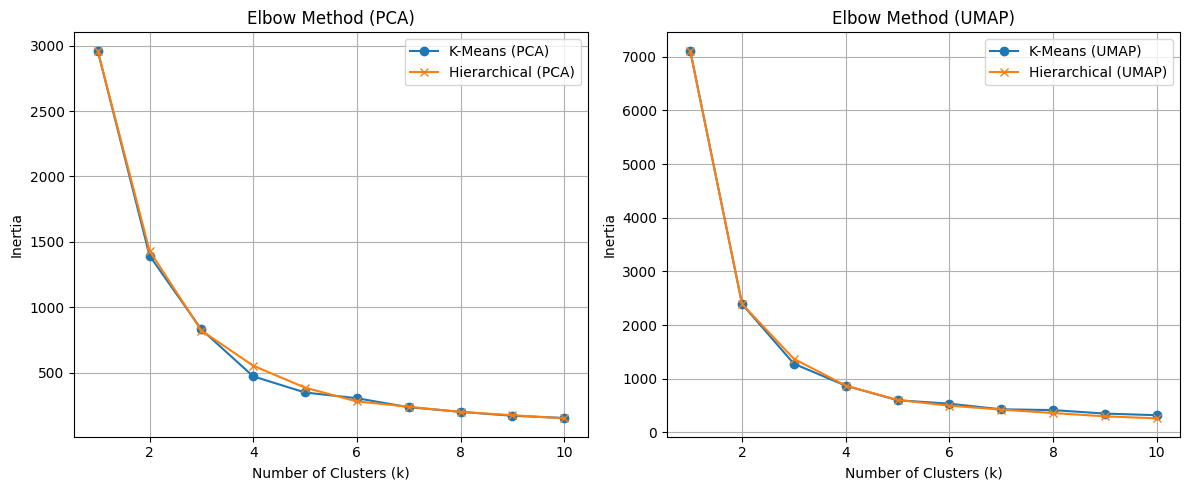

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering

k_range = range(1, 11)  # You can adjust the range

# ===========================
# Inertia on PCA Projection
# ===========================
inertias_kmeans_pca = []
inertias_hierarchical_pca = []

for k in k_range:
    # --- K-Means ---
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertias_kmeans_pca.append(kmeans.inertia_)

    # --- Hierarchical ---
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(pca_result)

    inertia = 0
    for i in range(k):
        cluster_points = pca_result[labels == i]
        if len(cluster_points) > 0:
            center = np.mean(cluster_points, axis=0)
            inertia += np.sum((cluster_points - center)**2)
    inertias_hierarchical_pca.append(inertia)

# ===========================
# Inertia on UMAP Projection
# ===========================
inertias_kmeans_umap = []
inertias_hierarchical_umap = []

for k in k_range:
    # --- K-Means ---
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(umap_result)
    inertias_kmeans_umap.append(kmeans.inertia_)

    # --- Hierarchical ---
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(umap_result)

    inertia = 0
    for i in range(k):
        cluster_points = umap_result[labels == i]
        if len(cluster_points) > 0:
            center = np.mean(cluster_points, axis=0)
            inertia += np.sum((cluster_points - center)**2)
    inertias_hierarchical_umap.append(inertia)

# ===========================
# Plot Elbow Curves
# ===========================
plt.figure(figsize=(12, 5))

# --- PCA plot ---
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias_kmeans_pca, marker='o', label='K-Means (PCA)')
plt.plot(k_range, inertias_hierarchical_pca, marker='x', label='Hierarchical (PCA)')
plt.title('Elbow Method (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)

# --- UMAP plot ---
plt.subplot(1, 2, 2)
plt.plot(k_range, inertias_kmeans_umap, marker='o', label='K-Means (UMAP)')
plt.plot(k_range, inertias_hierarchical_umap, marker='x', label='Hierarchical (UMAP)')
plt.title('Elbow Method (UMAP)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Per-Category (Substance) Hierarchical Clustering of Sports by Doping Substance

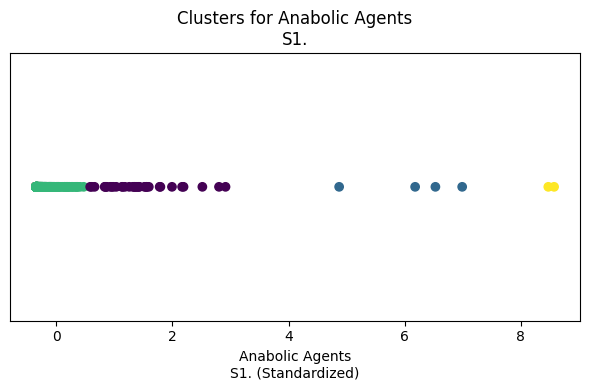

Clusters for Anabolic Agents
S1.:
  Cluster 0: ['Athletics', 'Bodybuilding', 'Cycling', 'Football', 'Powerlifting', 'Weightlifting']
  Cluster 1: ['Bodybuilding']
  Cluster 2: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Wrestling', 'Wushu']
  Cluster 3: ['Bodybuilding']




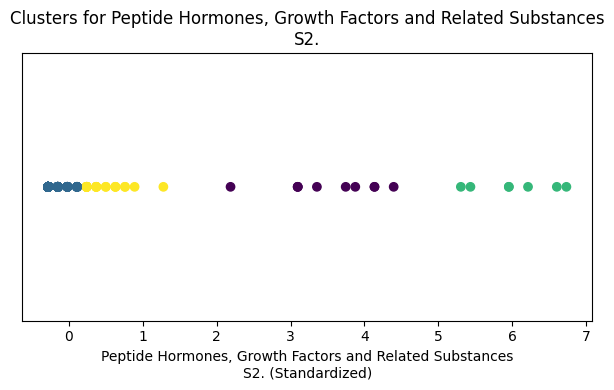

Clusters for Peptide Hormones, Growth Factors and Related Substances
S2.:
  Cluster 0: ['Athletics', 'Cycling']
  Cluster 1: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 2: ['Athletics', 'Cycling']
  Cluster 3: ['Aquatics', 'Athletics', 'Bodybuilding', 'Football', 'Ice Hockey', 'Powerlifting', 'Skiing', 'Triathlon', 'Weightlifting', 'Wrestling']




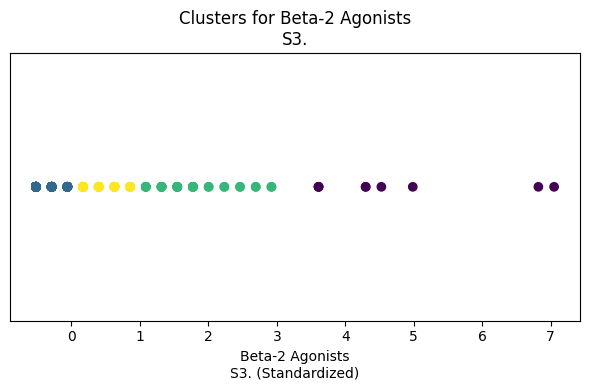

Clusters for Beta‐2 Agonists
S3.:
  Cluster 0: ['Aquatics', 'Athletics', 'Cycling', 'Powerlifting']
  Cluster 1: ['American Football', 'Archery', 'Arm Wrestling', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 2: ['Aquatics', 'Athletics', 'Bodybuilding', 'Cycling', 'Football', 'Handball', 'Ice Hockey', 'Powerlifting', 'Rowing', 'Triathlon', 'Weightlifting']
  Cluster 3: ['American Football', 'Aquatics', 'Athletics', 'Basketball', 'Bodybuilding', 'Boxing', 'Football', 'Handball', 'Ice Hockey', 'Judo', 'Kickboxing', 'Powerlifting', 'Rowing', 'Skat

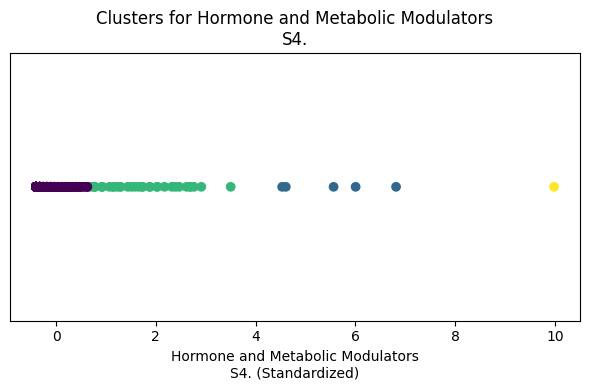

Clusters for Hormone and Metabolic Modulators
S4.:
  Cluster 0: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 1: ['Bodybuilding', 'Wrestling']
  Cluster 2: ['Aquatics', 'Athletics', 'Bodybuilding', 'Boxing', 'Cycling', 'Judo', 'Powerlifting', 'Skating', 'Weightlifting', 'Wrestling']
  Cluster 3: ['Athletics']




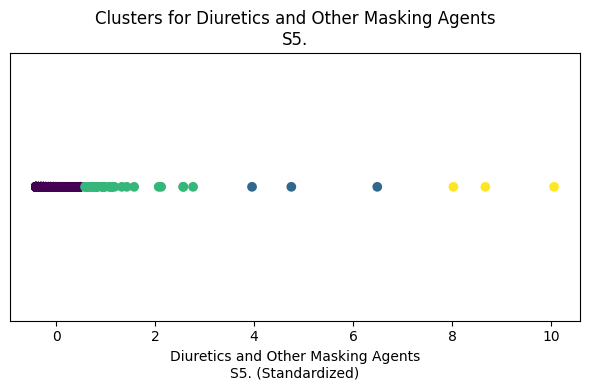

Clusters for Diuretics and Other Masking Agents
S5.:
  Cluster 0: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 1: ['Bodybuilding']
  Cluster 2: ['Athletics', 'Bodybuilding', 'Boxing', 'Cycling', 'Football', 'Judo', 'Powerlifting', 'Rowing', 'Weightlifting', 'Wrestling']
  Cluster 3: ['Bodybuilding']




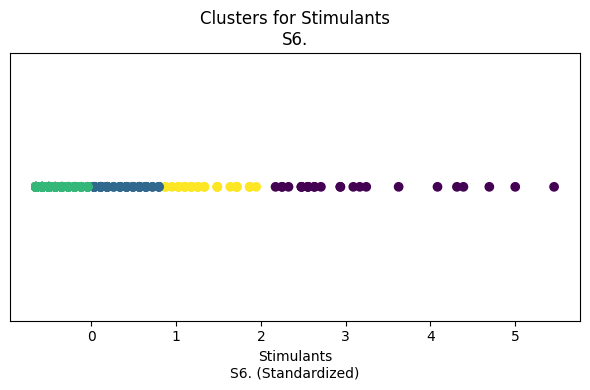

Clusters for Stimulants
S6.:
  Cluster 0: ['Athletics', 'Bodybuilding', 'Cycling', 'Football', 'Powerlifting', 'Weightlifting']
  Cluster 1: ['American Football', 'Aquatics', 'Basketball', 'Bodybuilding', 'Boxing', 'Cycling', 'Equestrian', 'Football', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Kickboxing', 'Muaythai', 'Powerlifting', 'Rowing', 'Tennis', 'Triathlon', 'Volleyball', 'Weightlifting', 'Wrestling']
  Cluster 2: ['American Football', 'Archery', 'Arm Wrestling', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Wrestling', 'Wushu']
  Cluster 3: ['American Football', 'Aquat

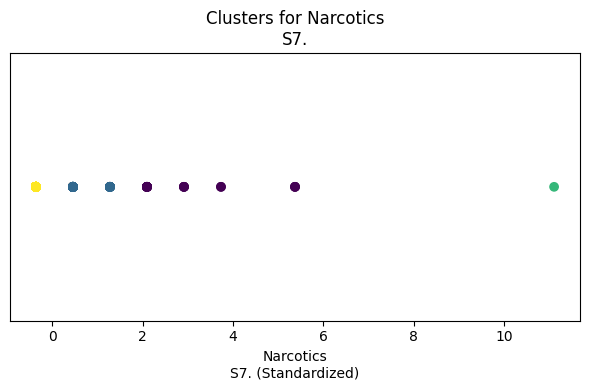

Clusters for Narcotics
S7.:
  Cluster 0: ['American Football', 'Athletics', 'Basketball', 'Bodybuilding', 'Boxing', 'Cycling', 'Football', 'Handball', 'Ice Hockey', 'Kabaddi', 'Powerboating', 'Tennis', 'Triathlon', 'Wrestling']
  Cluster 1: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Ice Hockey', 'Judo', 'Kickboxing', 'Powerlifting', 'Rowing', 'Shooting', 'Skiing', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 2: ['Cycling']
  Cluster 3: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo

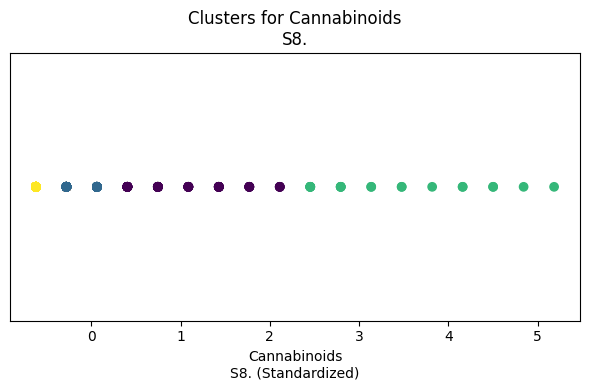

Clusters for Cannabinoids
S8.:
  Cluster 0: ['American Football', 'Aquatics', 'Athletics', 'Basketball', 'Bodybuilding', 'Boxing', 'Cycling', 'Equestrian', 'Field Hockey', 'Football', 'Handball', 'Ice Hockey', 'Judo', 'Karate', 'Kickboxing', 'Muaythai', 'Powerlifting', 'Roller Sports', 'Skating', 'Tennis', 'Volleyball', 'Weightlifting', 'Wrestling']
  Cluster 1: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Karate', 'Muaythai', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 2: ['American Football', 'Basketball', 'Bodybuilding', 'Boxing', 'Football', 'Kickboxing', 'Muaythai', 'P

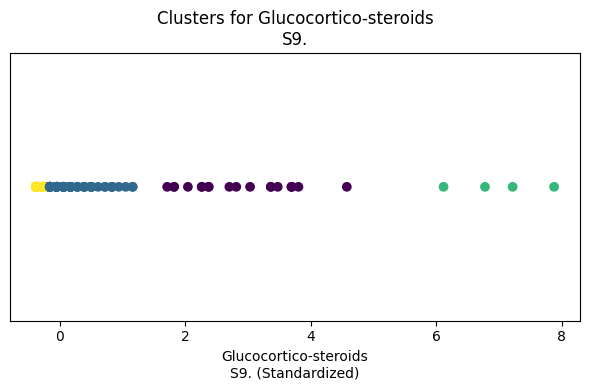

Clusters for Glucocortico‐steroids
S9.:
  Cluster 0: ['Athletics', 'Cycling', 'Football', 'Skiing']
  Cluster 1: ['American Football', 'Aquatics', 'Arm Wrestling', 'Athletics', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Karate', 'Kickboxing', 'Muaythai', 'Powerlifting', 'Roller Sports', 'Rowing', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 2: ['Cycling']
  Cluster 3: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating

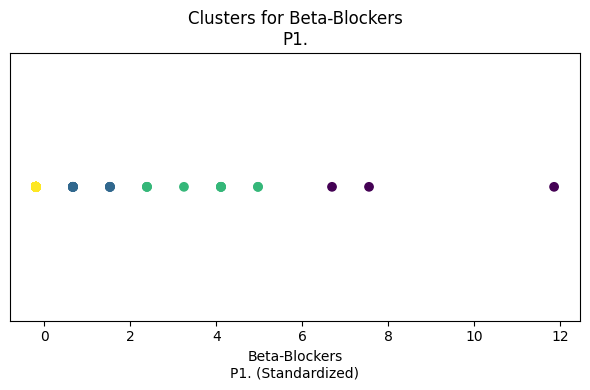

Clusters for Beta-Blockers
P1.:
  Cluster 0: ['Shooting', 'Underwater Sports']
  Cluster 1: ['Archery', 'Golf', 'Shooting']
  Cluster 2: ['Archery', 'Shooting']
  Cluster 3: ['American Football', 'Aquatics', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']




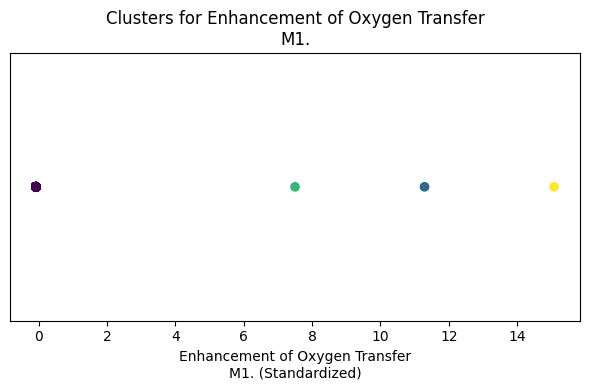

Clusters for Enhancement of Oxygen Transfer
M1.:
  Cluster 0: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 1: ['Cycling']
  Cluster 2: ['Cycling']
  Cluster 3: ['Athletics']




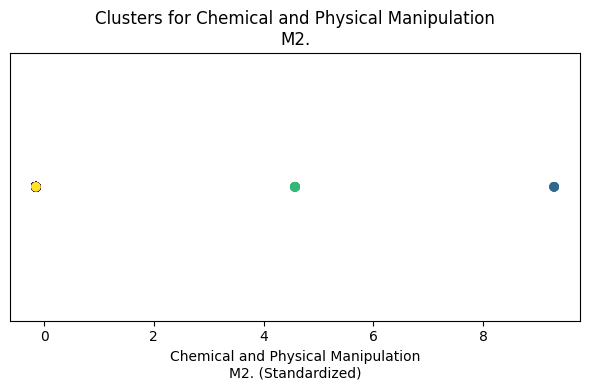

Clusters for Chemical and Physical Manipulation
M2.:
  Cluster 0: ['American Football', 'Aquatics', 'Archery', 'Arm Wrestling', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Bodybuilding', 'Boules Sports', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Goalball', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Kabaddi', 'Karate', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Roller Sports', 'Rowing', 'Sambo', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
  Cluster 1: ['Athletics', 'Cycling']
  Cluster 2: ['Athletics', 'Basketball', 'Football', 'Kickboxing', 'Powerlifting', 'Triathlon']
  Cluster 3: ['Boxing']




In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters
n_clusters = 4

# Data to analyze category-by-category
# Choose one of:
data_matrix = X_scaled       # ← works well with desired_columns index
# data_matrix = pca_result   # ← if using PCA components instead
# data_matrix = umap_result  # ← if visualizing compressed structure

# Iterate through doping categories (columns)
for category_index in range(data_matrix.shape[1]):
    # Extract column for current category
    category_data = data_matrix[:, category_index].reshape(-1, 1)

    # Standardize (optional if already scaled, safe to apply again)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(category_data)

    # Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(scaled_data)

    # Visualize
    plt.figure(figsize=(6, 4))
    plt.scatter(scaled_data[:, 0], np.zeros_like(scaled_data), c=cluster_labels, cmap='viridis')
    if 'desired_columns' in locals() and category_index < len(desired_columns):
        col_label = desired_columns[category_index]
    else:
        col_label = f"Feature {category_index}"
    plt.title(f"Clusters for {col_label}")
    plt.xlabel(f"{col_label} (Standardized)")
    plt.yticks([])
    plt.tight_layout()
    plt.show()

    # Print assignments
    print(f"Clusters for {col_label}:")
    for cluster_num in range(n_clusters):
        # Use sport_names to get the sport_year string, then extract the sport
        cluster_members_full_names = [sport_names[i] for i, label in enumerate(cluster_labels) if label == cluster_num]
        # Extract just the sport name (before the last '_')
        cluster_members_sports = sorted(list(set([name.rsplit('_', 1)[0] for name in cluster_members_full_names])))

        print(f"  Cluster {cluster_num}: {cluster_members_sports if cluster_members_sports else '(No points in this cluster)'}")
    print("\n")

### Migration Analysis

In [16]:
import pandas as pd

# ===========================
# PCA-Based Cluster Tracking
# ===========================
records_pca = []
for name, label in zip(sport_names, hierarchical_labels_pca):
    sport, year = name.rsplit('_', 1)
    records_pca.append({'sport': sport, 'year': int(year), 'cluster': int(label)})
df_pca = pd.DataFrame(records_pca)
pivot_pca = df_pca.pivot(index='sport', columns='year', values='cluster').sort_index()

print("=== PCA-Based Cluster Membership Over Time ===")
print(pivot_pca)

migrators_pca = pivot_pca[pivot_pca.nunique(axis=1) > 1].index.tolist()
print("\nSports that migrate between clusters (PCA):", migrators_pca)


# ===========================
# UMAP-Based Cluster Tracking
# ===========================
records_umap = []
for name, label in zip(sport_names, hierarchical_labels_umap):
    sport, year = name.rsplit('_', 1)
    records_umap.append({'sport': sport, 'year': int(year), 'cluster': int(label)})
df_umap = pd.DataFrame(records_umap)
pivot_umap = df_umap.pivot(index='sport', columns='year', values='cluster').sort_index()

print("\n=== UMAP-Based Cluster Membership Over Time ===")
print(pivot_umap)

migrators_umap = pivot_umap[pivot_umap.nunique(axis=1) > 1].index.tolist()
print("\nSports that migrate between clusters (UMAP):", migrators_umap)


=== PCA-Based Cluster Membership Over Time ===
year               2014  2015  2016  2017  2018  2019  2020  2021  2022
sport                                                                  
American Football     1     1     1     1     1     1     3     3     3
Aquatics              1     1     0     1     1     1     1     1     1
Archery               3     3     3     3     3     3     3     3     3
Arm Wrestling         3     3     3     3     3     3     3     3     3
Athletics             0     0     0     0     0     0     1     0     0
Badminton             3     3     3     3     3     3     3     3     3
Basketball            1     1     1     1     1     1     3     1     1
Biathlon              3     3     3     3     3     3     3     3     3
Bodybuilding          2     2     2     2     2     2     1     1     1
Boules Sports         3     3     3     3     3     3     3     3     3
Boxing                1     1     1     1     1     1     3     1     1
Cricket          

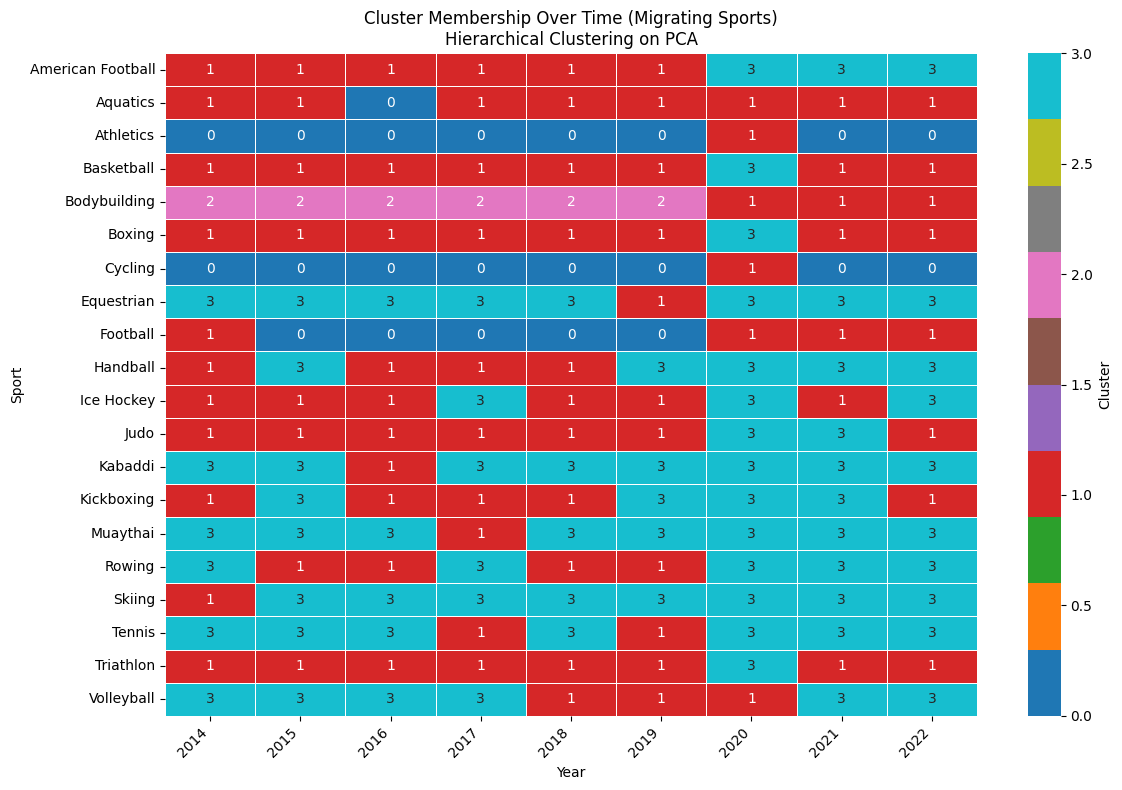

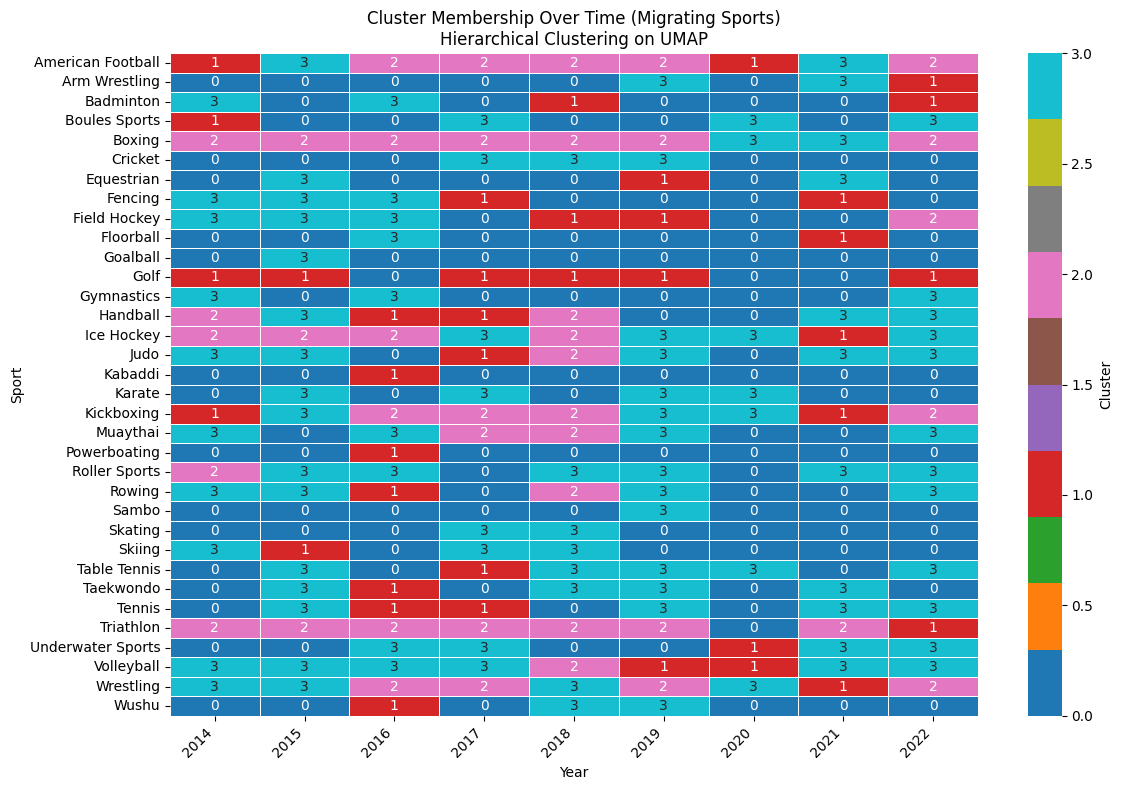

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_migration_heatmap(sport_names, labels, title):
    # Step 1: Build DataFrame
    records = []
    for name, label in zip(sport_names, labels):
        sport, year = name.rsplit('_', 1)
        records.append({'sport': sport, 'year': int(year), 'cluster': int(label)})
    df = pd.DataFrame(records)

    # Step 2: Filter to migrating sports
    migrators = df.groupby('sport')['cluster'].nunique()
    sports_to_plot = migrators[migrators > 1].index.tolist()
    df_mig = df[df['sport'].isin(sports_to_plot)]

    # Step 3: Pivot table
    pivot_mig = df_mig.pivot(index='sport', columns='year', values='cluster') \
                     .sort_index(axis=0).sort_index(axis=1)

    # Step 4: Handle NaNs
    pivot_mig = pivot_mig.fillna(-1).astype(int)

    # Step 5: Plot if possible
    if pivot_mig.empty:
        print(f"[{title}] No sports found that change clusters. Cannot create heatmap.")
    elif pivot_mig.isnull().all().all():
        print(f"[{title}] All values in the pivoted DataFrame are NaN. Cannot create heatmap.")
    else:
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_mig, annot=True, fmt="d", cmap="tab10",
                    cbar_kws={"label": "Cluster"}, linewidths=0.5)
        plt.title(f"Cluster Membership Over Time (Migrating Sports)\n{title}")
        plt.xlabel("Year")
        plt.ylabel("Sport")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

# === PCA-Based Cluster Migration Heatmap ===
plot_cluster_migration_heatmap(sport_names, hierarchical_labels_pca, title="Hierarchical Clustering on PCA")

# === UMAP-Based Cluster Migration Heatmap ===
plot_cluster_migration_heatmap(sport_names, hierarchical_labels_umap, title="Hierarchical Clustering on UMAP")


### Permutation Feature Importance for Clustering


Permutation Feature Importances for: K-Means (PCA)
Stimulants\nS6.                                                 0.010870
Glucocortico‐steroids\nS9.                                      0.007005
Anabolic Agents\nS1.                                            0.006441
Peptide Hormones, Growth Factors and Related Substances\nS2.    0.002657
Diuretics and Other Masking Agents\nS5.                         0.002254
Hormone and Metabolic Modulators\nS4.                           0.002254
Beta‐2 Agonists\nS3.                                            0.000000
Narcotics\nS7.                                                  0.000000
Cannabinoids\nS8.                                               0.000000
Beta-Blockers\nP1.                                              0.000000
Enhancement of Oxygen Transfer\nM1.                             0.000000
Chemical and Physical Manipulation\nM2.                         0.000000
dtype: float64


<ipython-input-18-3684334349>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


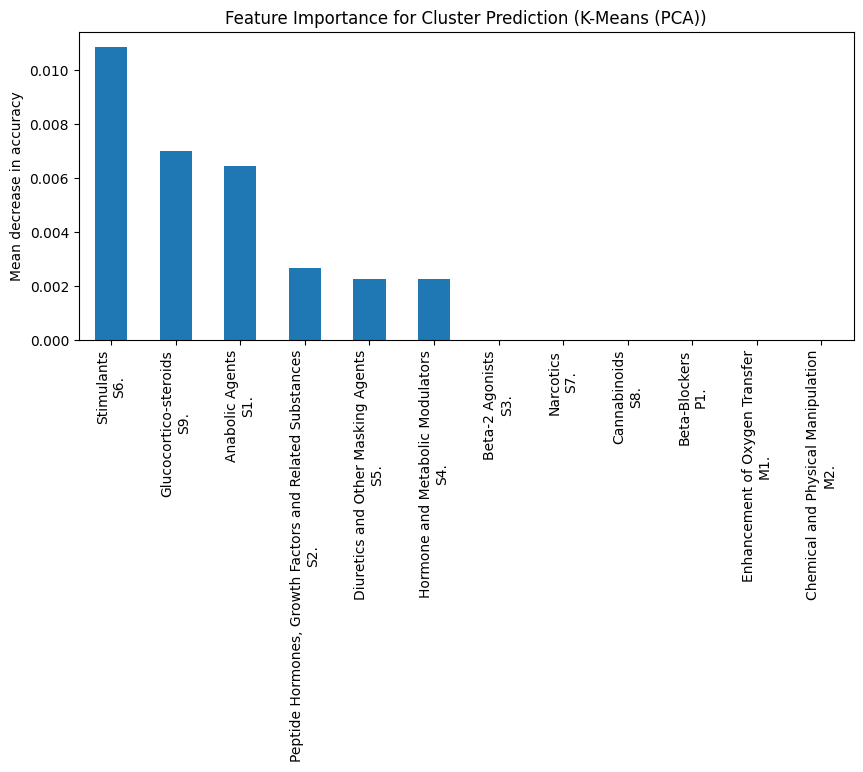


Permutation Feature Importances for: K-Means (UMAP)
Cannabinoids\nS8.                                               0.338889
Stimulants\nS6.                                                 0.125040
Narcotics\nS7.                                                  0.110628
Beta-Blockers\nP1.                                              0.055556
Beta‐2 Agonists\nS3.                                            0.023833
Peptide Hormones, Growth Factors and Related Substances\nS2.    0.003060
Hormone and Metabolic Modulators\nS4.                           0.002657
Anabolic Agents\nS1.                                            0.002335
Glucocortico‐steroids\nS9.                                      0.002254
Diuretics and Other Masking Agents\nS5.                         0.000161
Enhancement of Oxygen Transfer\nM1.                             0.000000
Chemical and Physical Manipulation\nM2.                         0.000000
dtype: float64


<ipython-input-18-3684334349>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


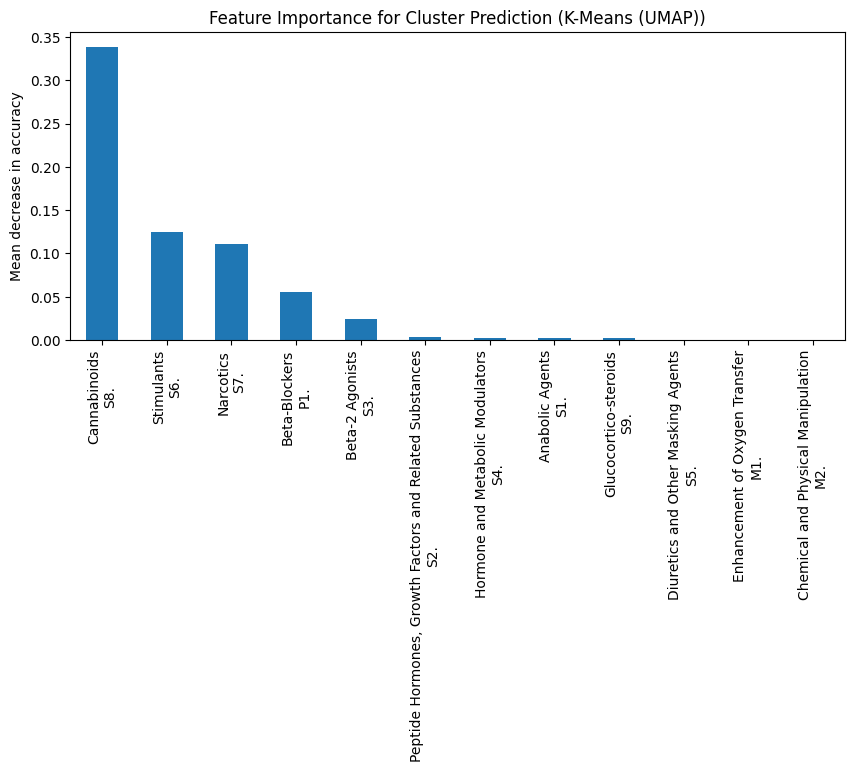


Permutation Feature Importances for: Hierarchical (PCA)
Stimulants\nS6.                                                 0.079630
Beta‐2 Agonists\nS3.                                            0.028663
Anabolic Agents\nS1.                                            0.022222
Glucocortico‐steroids\nS9.                                      0.019163
Cannabinoids\nS8.                                               0.013849
Narcotics\nS7.                                                  0.013205
Peptide Hormones, Growth Factors and Related Substances\nS2.    0.005153
Diuretics and Other Masking Agents\nS5.                         0.004348
Hormone and Metabolic Modulators\nS4.                           0.001530
Beta-Blockers\nP1.                                              0.000000
Enhancement of Oxygen Transfer\nM1.                             0.000000
Chemical and Physical Manipulation\nM2.                         0.000000
dtype: float64


<ipython-input-18-3684334349>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


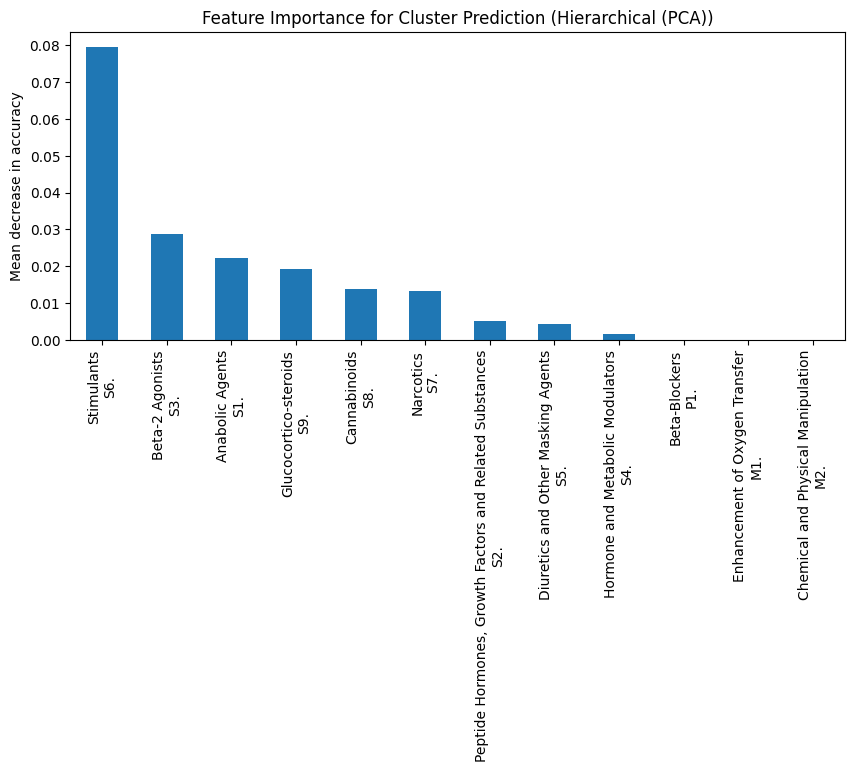


Permutation Feature Importances for: Hierarchical (UMAP)
Cannabinoids\nS8.                                               0.343639
Narcotics\nS7.                                                  0.187842
Beta-Blockers\nP1.                                              0.080274
Stimulants\nS6.                                                 0.051449
Beta‐2 Agonists\nS3.                                            0.031884
Anabolic Agents\nS1.                                            0.007407
Hormone and Metabolic Modulators\nS4.                           0.003784
Glucocortico‐steroids\nS9.                                      0.002415
Peptide Hormones, Growth Factors and Related Substances\nS2.    0.002335
Diuretics and Other Masking Agents\nS5.                         0.000081
Enhancement of Oxygen Transfer\nM1.                             0.000000
Chemical and Physical Manipulation\nM2.                         0.000000
dtype: float64


<ipython-input-18-3684334349>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


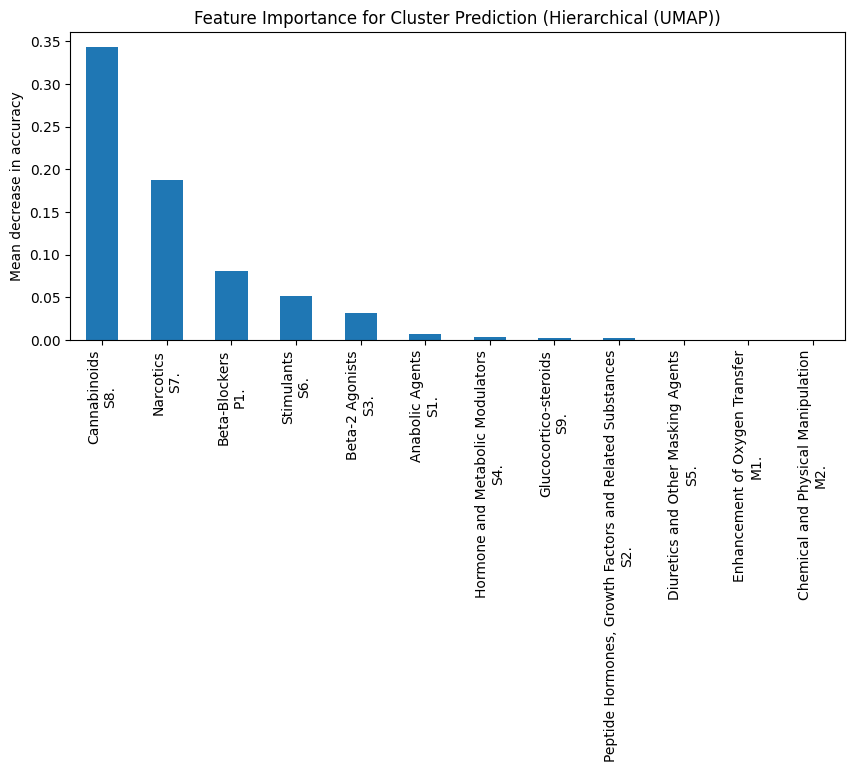

In [18]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

def cluster_importance(X, labels, feature_names, title=""):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, labels)

    result = permutation_importance(clf, X, labels, n_repeats=30, random_state=42)
    importances = pd.Series(result.importances_mean, index=feature_names)
    importances = importances.sort_values(ascending=False)

    print(f"\nPermutation Feature Importances for: {title}")
    print(importances)

    # Plot
    plt.figure(figsize=(10, 4))
    importances.plot.bar()
    plt.title(f"Feature Importance for Cluster Prediction ({title})")
    plt.ylabel("Mean decrease in accuracy")
    plt.tight_layout()
    plt.show()

# ===========================
# Handle Feature Names
# ===========================
# Adjust if padding was used
repeated_feature_names = desired_columns * (X.shape[1] // len(desired_columns))

# ===========================
# K-Means Clusters
# ===========================
cluster_importance(X, kmeans_labels_pca, repeated_feature_names, title="K-Means (PCA)")
cluster_importance(X, kmeans_labels_umap, repeated_feature_names, title="K-Means (UMAP)")

# ===========================
# Hierarchical Clusters
# ===========================
cluster_importance(X, hierarchical_labels_pca, repeated_feature_names, title="Hierarchical (PCA)")
cluster_importance(X, hierarchical_labels_umap, repeated_feature_names, title="Hierarchical (UMAP)")



For each doping category (e.g., Anabolic Agents, Peptide Hormones, etc.), hierarchical clustering is performed across all (sport, year) entries based solely on their standardized values for that specific substance. This method reveals which sports exhibit similar patterns for each type of doping agent, independently of their overall anti-doping profiles.

For each doping method, a color-coded scatter plot of standardized values is generated to visualize how sports are grouped into clusters. Additionally, a list of sports and years belonging to each cluster is provided, highlighting which sports share similar substance use patterns.

This granular, per-category clustering approach identifies specific similarities and anomalies in doping patterns that may not be apparent in a global or multi-variable analysis.

### Substance Profiles per sport

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import ipywidgets as widgets
from IPython.display import display, clear_output

# Build long-form dataframe from tables - ADDED THIS BLOCK
df_long_list = []

for year, df in tables.items():
    year_int = int(year)
    sport_col = df.columns[0]
    # Exclude the last column when iterating through substances
    # Corrected: Iterate through columns from the second (index 1) up to, but not including, the last one.
    # Use df.columns[1:] to get all columns after the first one (sport_col)
    # Then, potentially exclude a 'Total' column if it exists
    data_columns = df.columns[1:]
    if 'Total' in data_columns:
        data_columns = data_columns.drop('Total')

    for row in df.itertuples(index=False, name=None):
        sport = row[0]
        # Map column name to its index in the original row tuple
        col_index_map = {col: i for i, col in enumerate(df.columns)}

        for substance in data_columns:
            # Get the value using the original column index
            original_index = col_index_map.get(substance)
            if original_index is not None:
                raw_value = row[original_index]
                # Ensure count is treated as numeric and handle NaN
                count = pd.to_numeric(raw_value, errors='coerce')
                if pd.isna(count):
                    count = 0

                df_long_list.append({
                    'Sport': sport,
                    'Year': year_int,
                    'Substance': substance,
                    'Count': count
                })

df_long = pd.DataFrame(df_long_list)
# END OF ADDED BLOCK


yearly_changes = []

for chosen_sport in sorted(common_sports):
    # Use df_long defined above
    df_sport = df_long[df_long['Sport'] == chosen_sport]
    if df_sport.empty:
        continue

    pivot = df_sport.pivot_table(index='Year', columns='Substance', values='Count', fill_value=0)

    # Ensure there's data to normalize
    # Check if the sum of all counts is zero before normalizing
    if pivot.values.sum() == 0:
        print(f"Warning: No non-zero counts for {chosen_sport}. Skipping normalization and plotting.")
        continue


    # Normalize the pivot table
    # Add a small epsilon before division to avoid division by zero if a year has zero total count
    pivot_norm = pivot.div(pivot.sum(axis=1) + 1e-9, axis=0)


    years = list(pivot_norm.index)
    for i in range(1, len(years)):
        y_prev = years[i-1]
        y_curr = years[i]
        v_prev = pivot_norm.loc[y_prev].reindex(pivot_norm.columns, fill_value=0).values
        v_curr = pivot_norm.loc[y_curr].reindex(pivot_norm.columns, fill_value=0).values

        # Check if vectors are all zeros before calculating cosine similarity/distance
        # Sum the values to check if the vectors are zero vectors after normalization
        if np.sum(v_prev) < 1e-9 or np.sum(v_curr) < 1e-9: # Use a small threshold for floating point sums
            print(f"Warning: Near zero vector encountered for {chosen_sport} between {y_prev} and {y_curr}. Cosine similarity/distance is undefined.")
            similarity = np.nan # Or some other indicator
            distance = np.nan # Or some other indicator
        else:
            similarity = 1 - cosine(v_prev, v_curr)
            distance = cosine(v_prev, v_curr)

        yearly_changes.append({
            'Sport': chosen_sport,
            'Year1': y_prev,
            'Year2': y_curr,
            'Cosine Similarity': similarity,
            'Cosine Distance': distance
        })

    # Plot normalized area plot for each sport
    # Check if there are columns left to plot after normalization
    if not pivot_norm.empty and pivot_norm.shape[1] > 0:
        pivot_norm.plot.area(figsize=(12, 6), cmap='tab20')
        plt.title(f"Substance Profile Over Time: {chosen_sport}")
        plt.ylabel("Proportion of Substances")
        plt.xlabel("Year")
        # Adjust legend placement if it overlaps
        if pivot_norm.shape[1] > 10: # Arbitrary threshold, adjust as needed
             plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
             plt.legend(loc='best') # Let matplotlib find the best location
        plt.tight_layout()
        plt.show()
    elif not pivot_norm.empty and pivot_norm.shape[1] == 0:
         print(f"Warning: No substance columns remaining after exclusion for {chosen_sport}. Cannot create area plot.")
    else:
         print(f"Warning: Normalized pivot table is empty for {chosen_sport}. Cannot create area plot.")


# Convert results to DataFrame for later analysis
changes_df = pd.DataFrame(yearly_changes)


# ---- Interactive plot ----

# Assuming 'common_sports' is defined and contains the list of sports
sport_dropdown = widgets.Dropdown(
    options=sorted(list(common_sports)),
    description='Select Sport:',
    disabled=False,
)

output = widgets.Output()

def on_sport_change(change):
    with output:
        clear_output(wait=True)
        selected_sport = change['new']
        plot_similarity(selected_sport)

sport_dropdown.observe(on_sport_change, names='value')

def plot_similarity(selected_sport):
    df_plot = changes_df[changes_df['Sport'] == selected_sport]
    # Check if df_plot is empty or if Cosine Similarity column is all NaN
    if df_plot.empty or df_plot['Cosine Similarity'].isnull().all():
        print(f"No valid similarity data for {selected_sport}.")
        return
    plt.figure(figsize=(10, 5))
    plt.plot(df_plot['Year2'], df_plot['Cosine Similarity'], marker='o')
    plt.title(f"Cosine Similarity of Doping Profiles Year-to-Year for {selected_sport}")
    plt.xlabel("Year")
    plt.ylabel("Cosine Similarity")
    plt.grid(True)
    plt.show()

display(sport_dropdown, output)

Output hidden; open in https://colab.research.google.com to view.

Average Proportion of Substances Across Years (Common Sports):
Substance
Anabolic Agents\nS1.                                            0.535728
Diuretics and Other Masking Agents\nS5.                         0.159496
Hormone and Metabolic Modulators\nS4.                           0.104300
Glucocortico‐steroids\nS9.                                      0.064973
Beta‐2 Agonists\nS3.                                            0.043306
Peptide Hormones, Growth Factors and Related Substances\nS2.    0.042683
Cannabinoids\nS8.                                               0.035322
Narcotics\nS7.                                                  0.008165
Beta-Blockers\nP1.                                              0.004979
Chemical and Physical Manipulation\nM2.                         0.000579
Enhancement of Oxygen Transfer\nM1.                             0.000470
dtype: float64

Key Substances (Average Proportion > 5%, Common Sports):
['Anabolic Agents\nS1.', 'Diuretics and Other Maski

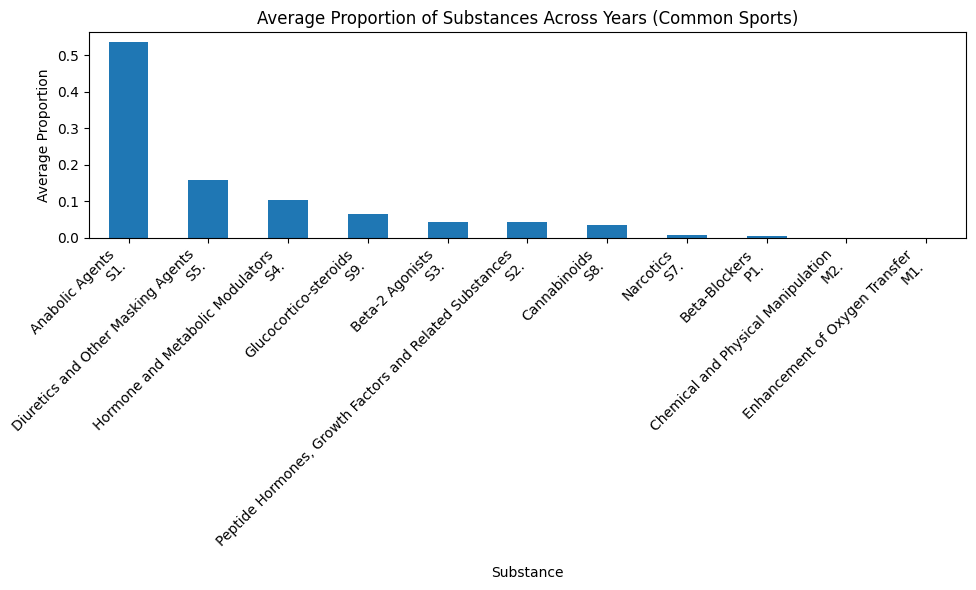

In [22]:
# Assuming 'df_long' and 'common_sports' are already defined from your previous code.

# Filter df_long to include only common sports
df_long_common = df_long[df_long['Sport'].isin(common_sports)]

# Create a pivot table for common sports
pivot_common = df_long_common.pivot_table(
    index='Year',
    columns='Substance',
    values='Count',
    fill_value=0
)

# Normalize the pivot table (proportions per year)
# Exclude the last column if it's the 'Total' or similar aggregate
if pivot_common.shape[1] > 1:
    # Assuming the last column is the 'Total' and should not be included in proportions
    pivot_norm_common = pivot_common.iloc[:, :-1].div(pivot_common.iloc[:, :-1].sum(axis=1), axis=0)
else:
    # Handle cases where there's only one substance column or no data
    pivot_norm_common = pivot_common.div(pivot_common.sum(axis=1), axis=0)


# Calculate the average proportion of each substance across all years for common sports
average_proportions_common = pivot_norm_common.mean().sort_values(ascending=False)

print("Average Proportion of Substances Across Years (Common Sports):")
print(average_proportions_common)

# Identify the top substances based on a threshold (e.g., average proportion > 0.05)
key_substances_common = average_proportions_common[average_proportions_common > 0.05].index.tolist()

print("\nKey Substances (Average Proportion > 5%, Common Sports):")
print(key_substances_common)

# Visualize the average proportions for common sports
plt.figure(figsize=(10, 6))
average_proportions_common.plot(kind='bar')
plt.title("Average Proportion of Substances Across Years (Common Sports)")
plt.xlabel("Substance")
plt.ylabel("Average Proportion")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Count of Substances Across Years (Common Sports, Excluding Total):
Substance
Anabolic Agents\nS1.                                            27.932367
Stimulants\nS6.                                                  8.574879
Diuretics and Other Masking Agents\nS5.                          8.272947
Hormone and Metabolic Modulators\nS4.                            5.480676
Glucocortico‐steroids\nS9.                                       3.446860
Beta‐2 Agonists\nS3.                                             2.263285
Peptide Hormones, Growth Factors and Related Substances\nS2.     2.140097
Cannabinoids\nS8.                                                1.816425
Narcotics\nS7.                                                   0.446860
Beta-Blockers\nP1.                                               0.222222
Chemical and Physical Manipulation\nM2.                          0.031401
Enhancement of Oxygen Transfer\nM1.                              0.021739
dtype: float64

Key Substan

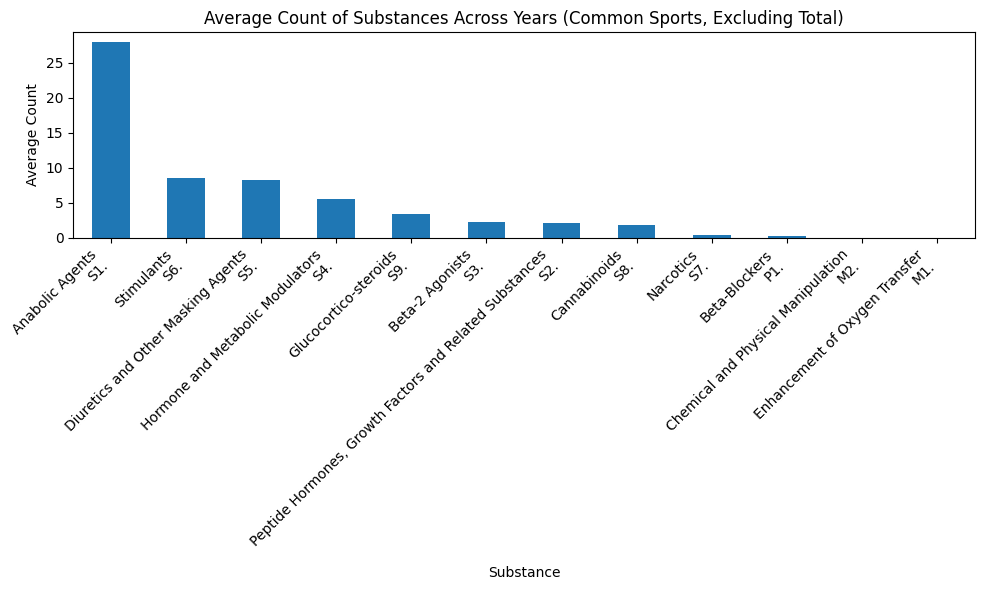


Trends for All Substances (Common Sports, Excluding Total):

Substance: Anabolic Agents
S1.
  Overall trend: decreasing (slope: -99.38)
  Year-to-year change in count:
Year
2015    250
2016    -19
2017     51
2018   -122
2019     47
2020   -965
2021    194
2022    197


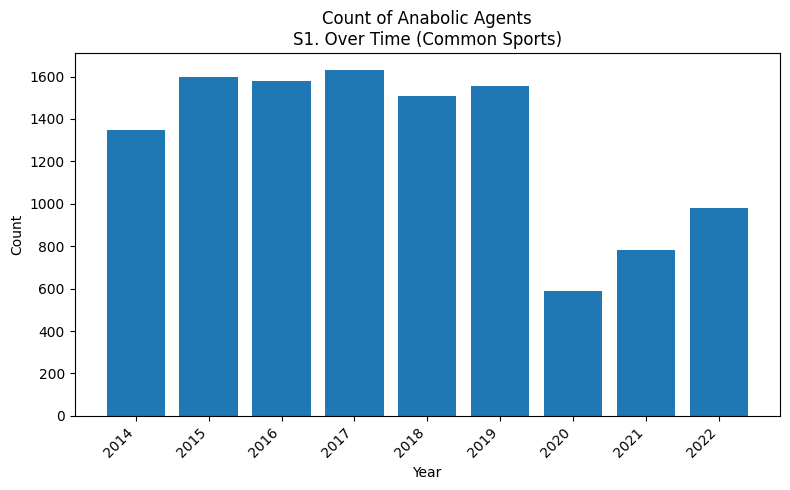


Substance: Beta-Blockers
P1.
  Overall trend: stable (slope: -0.72)
  Year-to-year change in count:
Year
2015   -6
2016   -6
2017    2
2018    2
2019    0
2020    4
2021   -5
2022   -4


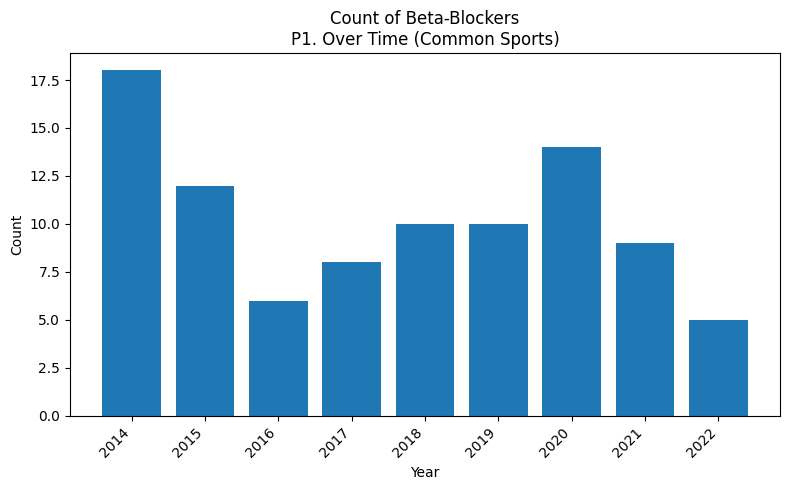


Substance: Beta‐2 Agonists
S3.
  Overall trend: decreasing (slope: -8.75)
  Year-to-year change in count:
Year
2015    -7
2016    46
2017   -20
2018    22
2019   -22
2020   -68
2021    -5
2022     2


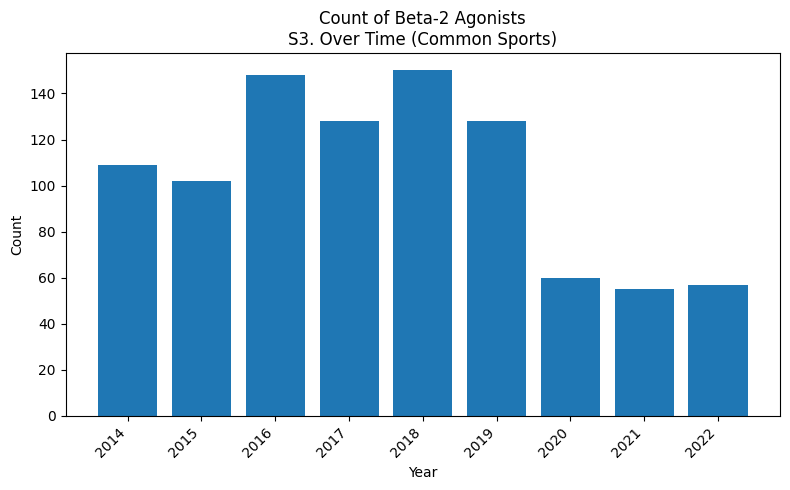


Substance: Cannabinoids
S8.
  Overall trend: stable (slope: -0.58)
  Year-to-year change in count:
Year
2015    43
2016   -14
2017    41
2018   -16
2019   -13
2020   -62
2021    34
2022    33


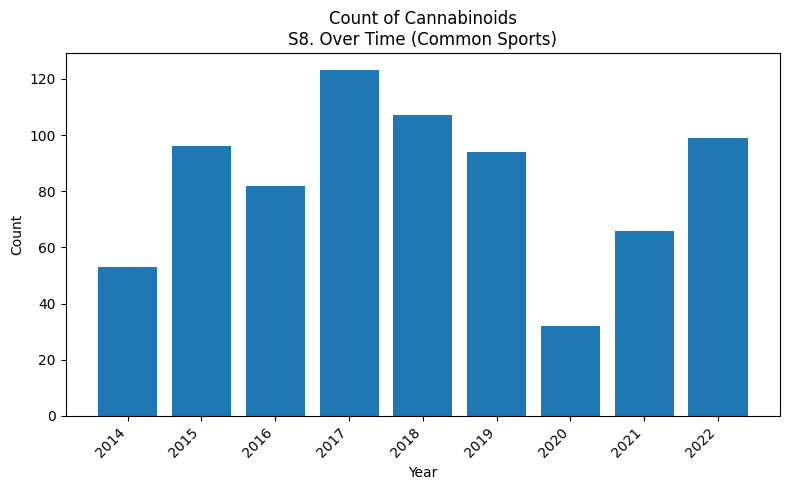


Substance: Chemical and Physical Manipulation
M2.
  Overall trend: stable (slope: -0.20)
  Year-to-year change in count:
Year
2015   -2
2016    3
2017   -3
2018    0
2019   -1
2020    0
2021    0
2022    3


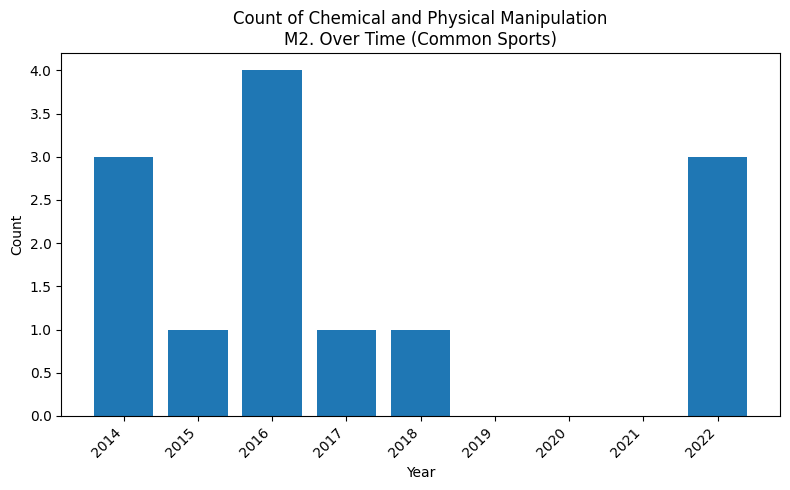


Substance: Diuretics and Other Masking Agents
S5.
  Overall trend: decreasing (slope: -14.87)
  Year-to-year change in count:
Year
2015     53
2016     26
2017     94
2018    -49
2019    112
2020   -386
2021     68
2022     59


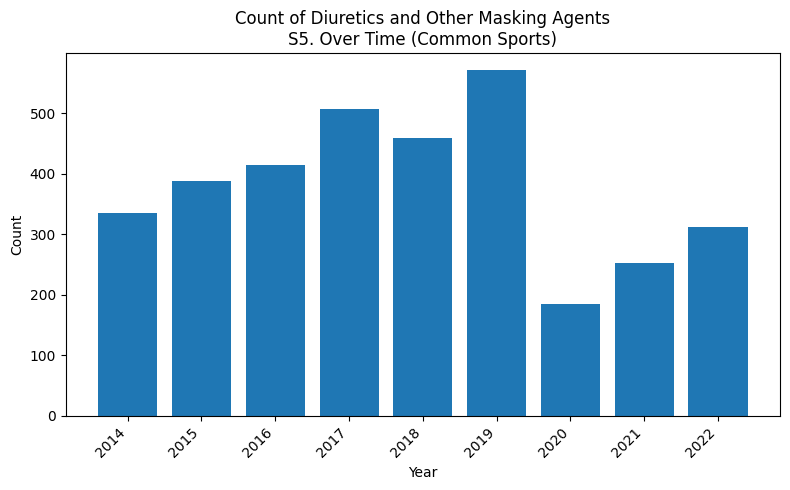


Substance: Enhancement of Oxygen Transfer
M1.
  Overall trend: stable (slope: 0.23)
  Year-to-year change in count:
Year
2015    0
2016    0
2017    0
2018    3
2019   -1
2020   -2
2021    4
2022   -4


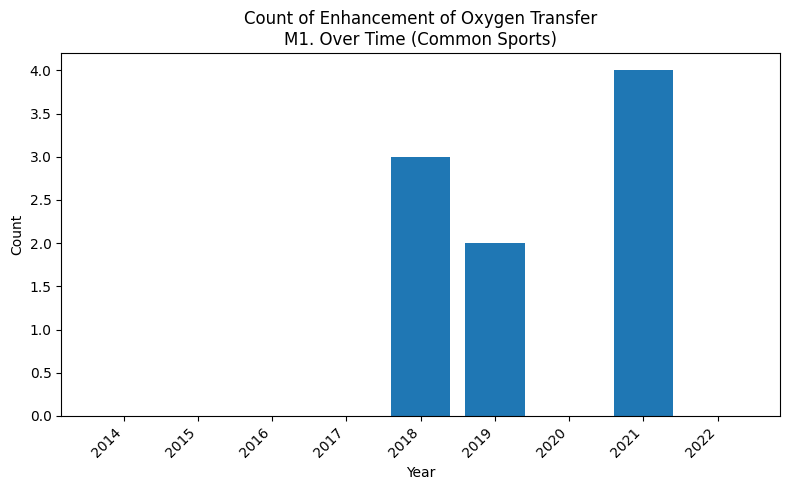


Substance: Glucocortico‐steroids
S9.
  Overall trend: decreasing (slope: -18.28)
  Year-to-year change in count:
Year
2015    -24
2016    -42
2017     35
2018     58
2019    -49
2020   -135
2021     33
2022    -32


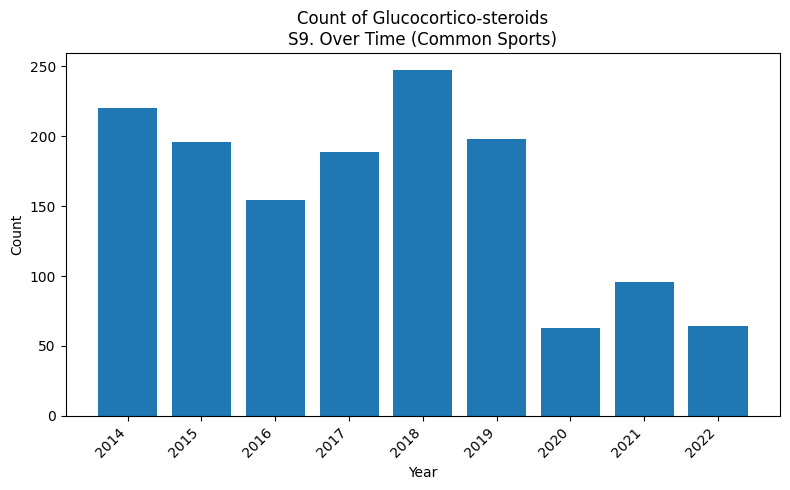


Substance: Hormone and Metabolic Modulators
S4.
  Overall trend: decreasing (slope: -5.22)
  Year-to-year change in count:
Year
2015      4
2016    489
2017   -352
2018     -1
2019     26
2020   -191
2021    107
2022     34


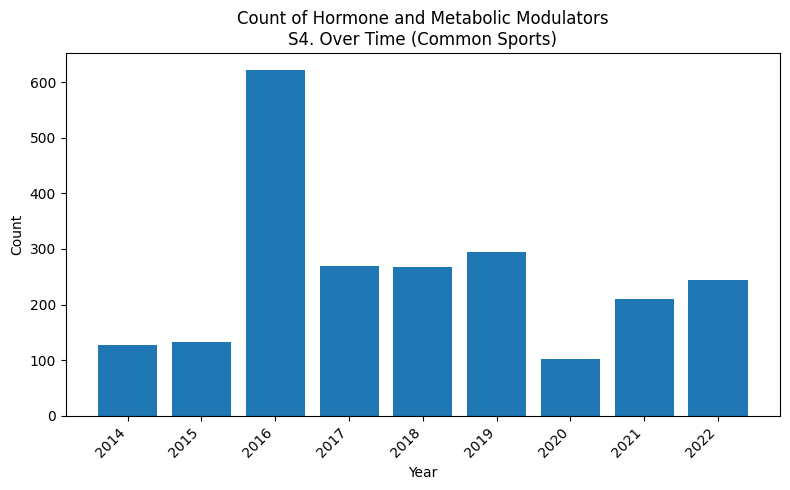


Substance: Narcotics
S7.
  Overall trend: decreasing (slope: -1.47)
  Year-to-year change in count:
Year
2015    -1
2016    19
2017    11
2018   -30
2019     2
2020   -16
2021    16
2022    -1


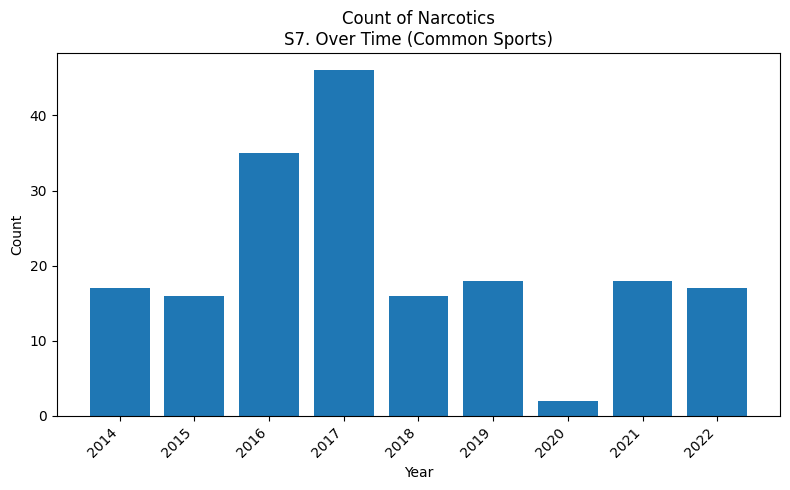


Substance: Peptide Hormones, Growth Factors and Related Substances
S2.
  Overall trend: stable (slope: -0.35)
  Year-to-year change in count:
Year
2015     4
2016     9
2017    18
2018   -13
2019    18
2020   -80
2021    52
2022    11


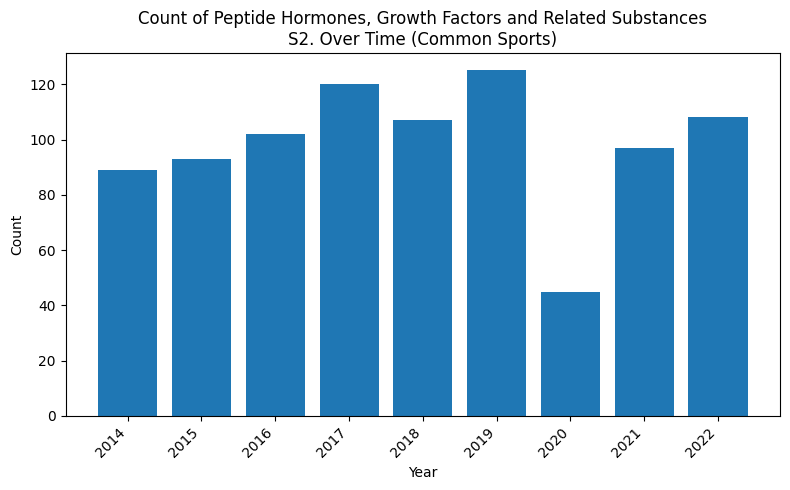


Substance: Stimulants
S6.
  Overall trend: decreasing (slope: -19.43)
  Year-to-year change in count:
Year
2015     24
2016     33
2017    -41
2018     70
2019      9
2020   -304
2021     86
2022     55


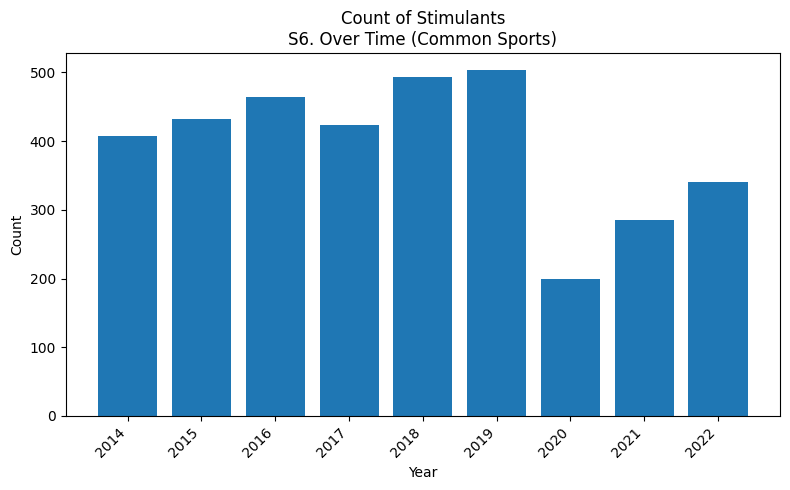

In [23]:
# Build long-form dataframe from tables
df_long_list = []

for year, df in tables.items():
    year_int = int(year)
    sport_col = df.columns[0]
    # Exclude the last column when iterating through substances
    for row in df.itertuples(index=False, name=None):
        sport = row[0]
        # Iterate through columns from the second to the second to last
        for i, substance in enumerate(df.columns[1:-1], 1):
            count = row[i]
            df_long_list.append({
                'Sport': sport,
                'Year': year_int,
                'Substance': substance,
                'Count': count
            })

df_long = pd.DataFrame(df_long_list)


# Assuming 'df_long' and 'common_sports' are already defined from your previous code.

# Filter df_long to include only common sports
df_long_common = df_long[df_long['Sport'].isin(common_sports)].copy() # Added .copy() to avoid SettingWithCopyWarning

# Remove rows where 'Substance' is 'Total'
df_long_common = df_long_common[df_long_common['Substance'] != 'Total'].copy() # Added .copy()


# Create a pivot table for common sports (using raw counts)
pivot_common_counts = df_long_common.pivot_table(
    index='Year',
    columns='Substance',
    values='Count',
    fill_value=0
)

# Calculate the average count of each substance across all years for common sports
average_counts_common = pivot_common_counts.mean().sort_values(ascending=False)

print("Average Count of Substances Across Years (Common Sports, Excluding Total):")
print(average_counts_common)

# Identify the top substances based on a threshold (adjust threshold as needed for counts)
# Using a threshold of 10 for demonstration, adjust based on your data scale
key_substances_common_counts = average_counts_common[average_counts_common > 10].index.tolist()

print("\nKey Substances (Average Count > 10, Common Sports, Excluding Total):")
print(key_substances_common_counts)

# Visualize the average counts for common sports
plt.figure(figsize=(10, 6))
average_counts_common.plot(kind='bar')
plt.title("Average Count of Substances Across Years (Common Sports, Excluding Total)")
plt.xlabel("Substance")
plt.ylabel("Average Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Describe trends for all substances (using raw counts) and visualize with histograms
print("\nTrends for All Substances (Common Sports, Excluding Total):")
# Iterate through all unique substances in df_long_common
for substance in sorted(df_long_common['Substance'].unique()):
    print(f"\nSubstance: {substance}")

    # Extract data for the current substance across all years for common sports
    substance_data_common_counts = df_long_common[df_long_common['Substance'] == substance].groupby('Year')['Count'].sum()

    if not substance_data_common_counts.empty:
        # Calculate overall trend
        years = substance_data_common_counts.index.values.reshape(-1, 1)
        counts = substance_data_common_counts.values

        if len(years) > 1:
            try:
                from sklearn.linear_model import LinearRegression
                model = LinearRegression()
                model.fit(years, counts)
                slope = model.coef_[0]

                if slope > 1:  # Adjust threshold for increasing trend based on counts
                    trend = "increasing"
                elif slope < -1:  # Adjust threshold for decreasing trend based on counts
                    trend = "decreasing"
                else:
                    trend = "stable"

                print(f"  Overall trend: {trend} (slope: {slope:.2f})")
            except Exception as e:
                print(f"  Could not determine overall trend: {e}")

        # Describe year-to-year fluctuations
        if len(substance_data_common_counts) > 1:
            changes = substance_data_common_counts.diff().dropna() # Use diff() for raw count changes
            if not changes.empty:
                print("  Year-to-year change in count:")
                print(changes.to_string(float_format='{:.0f}'.format))
            else:
                print("  Not enough data to calculate year-to-year change.")

        # Visualize the trend with a histogram
        plt.figure(figsize=(8, 5))
        plt.bar(substance_data_common_counts.index, substance_data_common_counts.values)
        plt.title(f"Count of {substance} Over Time (Common Sports)")
        plt.xlabel("Year")
        plt.ylabel("Count")
        plt.xticks(substance_data_common_counts.index, rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"  No data available for {substance} in common sports.")

In [25]:
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Precompute yearly cosine similarities for all sports
yearly_changes = []

for chosen_sport in sorted(common_sports):
    df_sport = df_long[df_long['Sport'] == chosen_sport]
    if df_sport.empty:
        continue

    pivot = df_sport.pivot_table(index='Year', columns='Substance', values='Count', fill_value=0)
    pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
    years = list(pivot_norm.index)
    for i in range(1, len(years)):
        y_prev = years[i-1]
        y_curr = years[i]
        v_prev = pivot_norm.loc[y_prev].reindex(pivot_norm.columns, fill_value=0).values
        v_curr = pivot_norm.loc[y_curr].reindex(pivot_norm.columns, fill_value=0).values
        similarity = 1 - cosine(v_prev, v_curr)
        distance = cosine(v_prev, v_curr)
        yearly_changes.append({
            'Sport': chosen_sport,
            'Year1': y_prev,
            'Year2': y_curr,
            'Cosine Similarity': similarity,
            'Cosine Distance': distance
        })

changes_df = pd.DataFrame(yearly_changes)

# ---- Interactive plot ----

def plot_similarity(selected_sport):
    df_plot = changes_df[changes_df['Sport'] == selected_sport]
    if df_plot.empty:
        print("No data for this sport.")
        return
    plt.figure(figsize=(10, 5))
    plt.plot(df_plot['Year2'], df_plot['Cosine Similarity'], marker='o')
    plt.title(f"Year-to-Year Cosine Similarity for {selected_sport}")
    plt.xlabel("Year")
    plt.ylabel("Cosine Similarity (vs previous year)")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a dropdown toggle for sports
sport_dropdown = widgets.Dropdown(
    options=sorted(changes_df['Sport'].unique()),
    value=sorted(changes_df['Sport'].unique())[0],
    description='Sport:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='350px')
)

widgets.interact(plot_similarity, selected_sport=sport_dropdown)



interactive(children=(Dropdown(description='Sport:', layout=Layout(width='350px'), options=('American Football…

<function __main__.plot_similarity(selected_sport)>

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cosine

results = []

for chosen_sport in sorted(common_sports):
    # Exclude 2020
    df_sport = df_long[(df_long['Sport'] == chosen_sport) & (df_long['Year'] != 2020)]
    if df_sport.empty:
        continue

    # Build pivot table
    pivot = df_sport.pivot_table(index='Year', columns='Substance', values='Count', fill_value=0)
    pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

    # Exclude the last column (e.g., "Total" or any last substance column)
    if pivot_norm.shape[1] > 1:
        pivot_norm = pivot_norm.iloc[:, :-1]

    # Only if more than one substance and nonzero
    if pivot_norm.shape[1] > 1 and pivot_norm.sum().sum() > 0:
        # Get first and last year rows
        profile_early = pivot_norm.iloc[0].values
        profile_late = pivot_norm.iloc[-1].values

        # Re-align columns (in case substance columns differ between years)
        profile_early = pivot_norm.iloc[0].reindex(pivot_norm.columns, fill_value=0).values
        profile_late = pivot_norm.iloc[-1].reindex(pivot_norm.columns, fill_value=0).values

        similarity = 1 - cosine(profile_early, profile_late)
        distance = cosine(profile_early, profile_late)

        results.append({
            'Sport': chosen_sport,
            'Year Start': pivot_norm.index[0],
            'Year End': pivot_norm.index[-1],
            'Cosine Similarity': similarity,
            'Cosine Distance': distance
        })

        # (Optional: show the plot)
        pivot_norm.plot.area(figsize=(12,6), cmap='tab20')
        plt.title(f"Substance Profile Over Time: {chosen_sport} (excl. 2020)\nCosine similarity ({pivot_norm.index[0]} vs {pivot_norm.index[-1]}): {similarity:.2f}")
        plt.ylabel("Proportion of Substances")
        plt.xlabel("Year")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Print all results, sorted by greatest change (lowest similarity)
results_df = pd.DataFrame(results).sort_values('Cosine Similarity')
print(results_df)


Output hidden; open in https://colab.research.google.com to view.

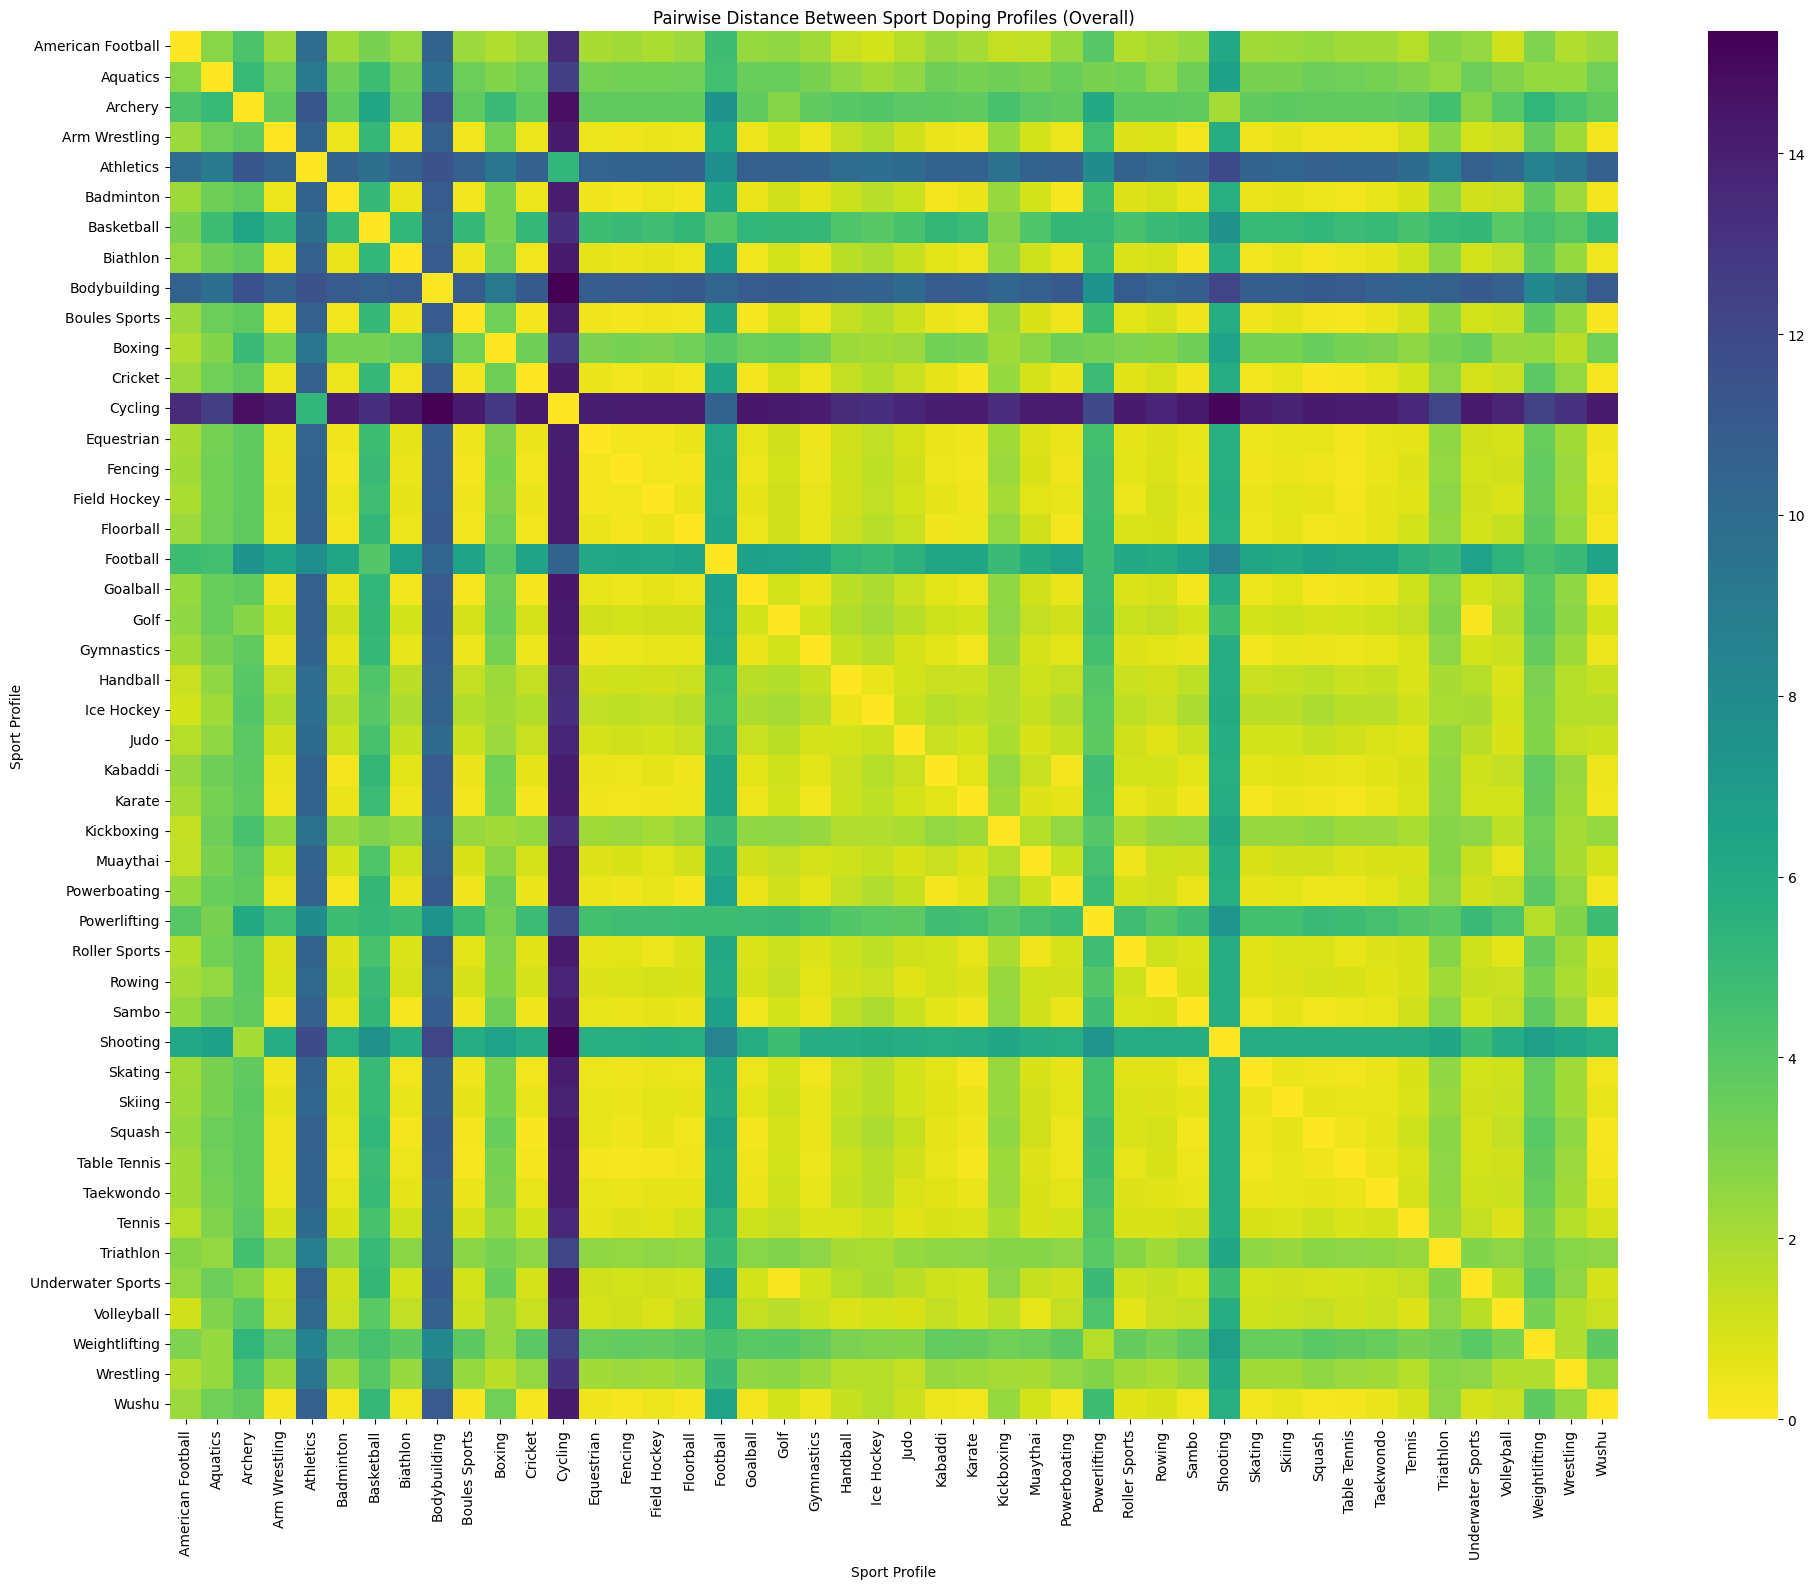


Top 20 Most Similar Sport Doping Profiles (Overall, by Euclidean Distance):
             Sport1             Sport2  Distance
915            Golf  Underwater Sports  0.145173
542         Cricket             Squash  0.163086
459   Boules Sports              Wushu  0.173028
258       Badminton       Powerboating  0.180633
354        Biathlon              Sambo  0.182049
451   Boules Sports       Table Tennis  0.183955
1184         Karate            Skating  0.192333
681         Fencing       Table Tennis  0.193756
551         Cricket              Wushu  0.197598
1701         Squash              Wushu  0.199655
781       Floorball              Wushu  0.221603
244       Badminton            Fencing  0.228888
689         Fencing              Wushu  0.232009
1187         Karate       Table Tennis  0.238854
432   Boules Sports           Goalball  0.239798
246       Badminton          Floorball  0.242402
1747   Table Tennis              Wushu  0.244585
864        Goalball             Squash  0

In [26]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_long and common_sports are already defined

# Filter df_long to include only common sports
df_long_common = df_long[df_long['Sport'].isin(common_sports)].copy()

# Aggregate doping data per sport across all years
# Group by Sport and sum the counts for each substance
sport_profiles = df_long_common.groupby('Sport').agg(
    {'Count': lambda x: list(x)} # Aggregate counts into a list for each sport
)

# Create a new DataFrame where each row is a sport and columns are substances
# Need to handle missing substances for some sports
# First, get a list of all unique substances
all_substances = sorted(df_long_common['Substance'].unique())

# Create a dictionary to hold the aggregated data for each sport
aggregated_data = {}
# Convert common_sports set to a list for consistent ordering
common_sports_list = sorted(list(common_sports))
for sport in common_sports_list:
    sport_df = df_long_common[df_long_common['Sport'] == sport]
    substance_counts = sport_df.groupby('Substance')['Count'].sum().to_dict()
    # Fill in missing substances with 0
    full_profile = {substance: substance_counts.get(substance, 0) for substance in all_substances}
    aggregated_data[sport] = full_profile

# Convert the aggregated data to a DataFrame
sport_profiles_df = pd.DataFrame.from_dict(aggregated_data, orient='index')

# 1. Standardize the data (now based on aggregated sport profiles)
scaler = StandardScaler()
X_scaled_sports = scaler.fit_transform(sport_profiles_df)

# 2. Calculate pairwise distances (e.g., Euclidean distance)
# You can choose different distance metrics like 'cosine', 'cityblock', etc.
distance_matrix_sports = pdist(X_scaled_sports, metric='euclidean')

# 3. Convert to a square distance matrix
square_distance_matrix_sports = squareform(distance_matrix_sports)

# 4. Create a DataFrame for easier visualization
# Use the list of common sports as index and columns
distance_df_sports = pd.DataFrame(square_distance_matrix_sports, index=common_sports_list, columns=common_sports_list)

# 5. Visualize the distance matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(distance_df_sports, cmap="viridis_r", annot=False) # Use annot=True to show values
plt.title("Pairwise Distance Between Sport Doping Profiles (Overall)")
plt.xlabel("Sport Profile")
plt.ylabel("Sport Profile")
plt.tight_layout()
plt.show()

# 6. Identify pairs of most similar profiles (smallest distances)
# We can melt the distance matrix and sort
distance_melted_sports = distance_df_sports.stack().reset_index()
distance_melted_sports.columns = ['Sport1', 'Sport2', 'Distance']

# Remove self-comparisons and duplicate pairs
distance_melted_sports = distance_melted_sports[distance_melted_sports['Sport1'] != distance_melted_sports['Sport2']]
distance_melted_sports['Sorted_Sports'] = distance_melted_sports.apply(lambda row: tuple(sorted((row['Sport1'], row['Sport2']))), axis=1)
distance_melted_sports = distance_melted_sports.drop_duplicates(subset=['Sorted_Sports'])

# Sort by distance to find the most similar pairs
most_similar_pairs_sports = distance_melted_sports.sort_values(by='Distance').head(20) # Show the top 20 most similar pairs

print("\nTop 20 Most Similar Sport Doping Profiles (Overall, by Euclidean Distance):")
print(most_similar_pairs_sports[['Sport1', 'Sport2', 'Distance']])

# You can also identify pairs within a certain similarity threshold
# similarity_threshold = 10 # Adjust the threshold as needed based on the scale of your data
# similar_pairs_threshold_sports = distance_melted_sports[distance_melted_sports['Distance'] < similarity_threshold]

# if not similar_pairs_threshold_sports.empty:
#     print(f"\nPairs of Sport Doping Profiles with Distance less than {similarity_threshold}:")
#     print(similar_pairs_threshold_sports[['Sport1', 'Sport2', 'Distance']])
# else:
#     print(f"\nNo pairs found with Distance less than {similarity_threshold}.")

In [27]:
import pandas as pd

# Assuming df_long and common_sports are already defined

# Filter df_long to include only common sports
df_long_common = df_long[df_long['Sport'].isin(common_sports)].copy()

# Aggregate doping data per sport across all years
# Group by Sport and sum the counts for each substance
sport_substance_counts = df_long_common.groupby(['Sport', 'Substance'])['Count'].sum().reset_index()

# Find the dominant substance for each sport (substance with the highest count)
dominant_substances_per_sport = sport_substance_counts.loc[
    sport_substance_counts.groupby('Sport')['Count'].idxmax()
]

print("Dominant Substance for Each Common Sport (Overall):")
print(dominant_substances_per_sport)

# Identify common dominant substances
# Count how many sports have each substance as their dominant substance
common_dominant_substances = dominant_substances_per_sport['Substance'].value_counts()

print("\nSubstances that are Dominant in Multiple Common Sports:")
print(common_dominant_substances[common_dominant_substances > 1])

# You can also get a list of sports for each common dominant substance
print("\nSports where each substance is dominant:")
for substance, count in common_dominant_substances[common_dominant_substances > 1].items():
    sports_with_dominant_substance = dominant_substances_per_sport[
        dominant_substances_per_sport['Substance'] == substance
    ]['Sport'].tolist()
    print(f"- {substance}: {sports_with_dominant_substance}")

Dominant Substance for Each Common Sport (Overall):
                 Sport                                Substance  Count
0    American Football                     Anabolic Agents\nS1.    144
23            Aquatics                          Stimulants\nS6.    219
29             Archery  Diuretics and Other Masking Agents\nS5.     50
36       Arm Wrestling                     Anabolic Agents\nS1.    159
48           Athletics                     Anabolic Agents\nS1.   1194
65           Badminton  Diuretics and Other Masking Agents\nS5.     12
83          Basketball                          Stimulants\nS6.    117
92            Biathlon    Hormone and Metabolic Modulators\nS4.     26
96        Bodybuilding                     Anabolic Agents\nS1.   4193
113      Boules Sports  Diuretics and Other Masking Agents\nS5.     21
120             Boxing                     Anabolic Agents\nS1.    272
139            Cricket               Glucocortico‐steroids\nS9.     10
144            Cycling   

In [28]:
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Precompute yearly cosine similarities for all sports
yearly_changes = []

for chosen_sport in sorted(common_sports):
    df_sport = df_long[df_long['Sport'] == chosen_sport]
    if df_sport.empty:
        continue

    # Exclude 2020
    df_sport = df_sport[df_sport['Year'] != 2020]

    pivot = df_sport.pivot_table(index='Year', columns='Substance', values='Count', fill_value=0)
    pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
    years = list(pivot_norm.index)
    for i in range(1, len(years)):
        y_prev = years[i-1]
        y_curr = years[i]
        v_prev = pivot_norm.loc[y_prev].reindex(pivot_norm.columns, fill_value=0).values
        v_curr = pivot_norm.loc[y_curr].reindex(pivot_norm.columns, fill_value=0).values
        similarity = 1 - cosine(v_prev, v_curr)
        distance = cosine(v_prev, v_curr)
        yearly_changes.append({
            'Sport': chosen_sport,
            'Year1': y_prev,
            'Year2': y_curr,
            'Cosine Similarity': similarity,
            'Cosine Distance': distance
        })

changes_df = pd.DataFrame(yearly_changes)

# ---- Interactive plot ----

def plot_similarity(selected_sport):
    df_plot = changes_df[changes_df['Sport'] == selected_sport]
    if df_plot.empty:
        print("No data for this sport.")
        return
    plt.figure(figsize=(10, 5))
    plt.plot(df_plot['Year2'], df_plot['Cosine Similarity'], marker='o')
    plt.title(f"Year-to-Year Cosine Similarity for {selected_sport}")
    plt.xlabel("Year")
    plt.ylabel("Cosine Similarity (vs previous year)")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a dropdown toggle for sports
sport_dropdown = widgets.Dropdown(
    options=sorted(changes_df['Sport'].unique()),
    value=sorted(changes_df['Sport'].unique())[0],
    description='Sport:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='350px')
)

widgets.interact(plot_similarity, selected_sport=sport_dropdown)


interactive(children=(Dropdown(description='Sport:', layout=Layout(width='350px'), options=('American Football…

<function __main__.plot_similarity(selected_sport)>

In [29]:
import pandas as pd
from scipy.spatial.distance import cosine

# Assuming df_long and common_sports are already defined from previous code

# Precompute yearly cosine similarities for all sports
yearly_changes = []

for chosen_sport in sorted(common_sports):
    df_sport = df_long[df_long['Sport'] == chosen_sport]
    if df_sport.empty:
        continue

    # Exclude 2020
    df_sport = df_sport[df_sport['Year'] != 2020]

    # Create a pivot table for the current sport
    pivot = df_sport.pivot_table(index='Year', columns='Substance', values='Count', fill_value=0)

    # Handle cases where a sport might have only one year of data after excluding 2020
    if len(pivot.index) < 2:
        continue

    # Normalize the pivot table (proportions per year)
    # Exclude the last column if it's the 'Total' or similar aggregate
    if pivot.shape[1] > 1:
        # Check if the sum of counts for a year is zero before dividing
        sum_per_year = pivot.iloc[:, :-1].sum(axis=1)
        pivot_norm = pivot.iloc[:, :-1].div(sum_per_year, axis=0)
        # Replace any resulting NaNs (from division by zero) with 0
        pivot_norm = pivot_norm.fillna(0)
    else:
        # Handle cases where there's only one substance column or no data
        sum_per_year = pivot.sum(axis=1)
        pivot_norm = pivot.div(sum_per_year, axis=0)
        pivot_norm = pivot_norm.fillna(0)


    years = list(pivot_norm.index)
    for i in range(1, len(years)):
        y_prev = years[i-1]
        y_curr = years[i]
        v_prev = pivot_norm.loc[y_prev].reindex(pivot_norm.columns, fill_value=0).values
        v_curr = pivot_norm.loc[y_curr].reindex(pivot_norm.columns, fill_value=0).values

        # Calculate cosine similarity
        # Handle cases where both vectors are zero vectors (e.g., no doping detected in both years)
        if v_prev.sum() == 0 and v_curr.sum() == 0:
            similarity = 1.0 # Cosine similarity is 1 for two zero vectors
            distance = 0.0
        elif v_prev.sum() == 0 or v_curr.sum() == 0:
             # If one vector is zero and the other is not, similarity is 0
             similarity = 0.0
             distance = 1.0
        else:
            similarity = 1 - cosine(v_prev, v_curr)
            distance = cosine(v_prev, v_curr)

        yearly_changes.append({
            'Sport': chosen_sport,
            'Year1': y_prev,
            'Year2': y_curr,
            'Cosine Similarity': similarity,
            'Cosine Distance': distance
        })

changes_df = pd.DataFrame(yearly_changes)

# --- Create Summary Table ---

# Calculate the average cosine similarity and distance for each sport
summary_table = changes_df.groupby('Sport').agg(
    Average_Cosine_Similarity=('Cosine Similarity', 'mean'),
    Average_Cosine_Distance=('Cosine Distance', 'mean'),
    Min_Cosine_Similarity=('Cosine Similarity', 'min'),
    Max_Cosine_Similarity=('Cosine Similarity', 'max')
).reset_index()

# Define volatility groups based on average cosine similarity ranges
# These ranges are examples and should be adjusted based on your data's distribution
def categorize_volatility(similarity):
    if similarity >= 0.90:
        return '🧊 Stable'
    elif similarity >= 0.80:
        return '📈 Recovered Stable'
    elif similarity >= 0.60:
        return '🌊 Moderate Volatility'
    else:
        return '⚠️ Highly Volatile'

summary_table['Volatility Group'] = summary_table['Average_Cosine_Similarity'].apply(categorize_volatility)

# Reorder columns for clarity
summary_table = summary_table[['Sport', 'Average_Cosine_Similarity', 'Min_Cosine_Similarity', 'Max_Cosine_Similarity', 'Volatility Group']]

# Sort by Volatility Group and then by Average Cosine Similarity
summary_table = summary_table.sort_values(by=['Volatility Group', 'Average_Cosine_Similarity'], ascending=[True, False])

# Display the summary table
print("Summary of Cosine Similarity and Volatility per Common Sport (Excluding 2020):")
display(summary_table)

# You can also display the count of sports in each volatility group
print("\nCount of Sports per Volatility Group:")
print(summary_table['Volatility Group'].value_counts())

Summary of Cosine Similarity and Volatility per Common Sport (Excluding 2020):


,Sport,Average_Cosine_Similarity,Min_Cosine_Similarity,Max_Cosine_Similarity,Volatility Group
34,Skating,0.584242,0.054677,0.916342,⚠️ Highly Volatile
13,Equestrian,0.536189,0.000000,0.774597,⚠️ Highly Volatile
30,Roller Sports,0.530518,0.341993,0.829288,⚠️ Highly Volatile
22,Ice Hockey,0.527862,0.090167,0.741373,⚠️ Highly Volatile
14,Fencing,0.513355,0.000000,0.884538,⚠️ Highly Volatile
27,Muaythai,0.491084,0.000000,0.831202,⚠️ Highly Volatile
41,Underwater Sports,0.489542,0.000000,0.903696,⚠️ Highly Volatile
25,Karate,0.451979,0.000000,0.968246,⚠️ Highly Volatile
7,Biathlon,0.414331,0.000000,0.970143,⚠️ Highly Volatile
19,Golf,0.412754,0.000000,0.670820,⚠️ Highly Volatile



Count of Sports per Volatility Group:
Volatility Group
⚠️ Highly Volatile       16
🧊 Stable                 14
🌊 Moderate Volatility    11
📈 Recovered Stable        5
Name: count, dtype: int64


## Outlook - Futur Research ideas

### Forecasting for substances depending on year and sport

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Build long-form dataframe from tables
df_long_list = []

for year, df in tables.items():
    year_int = int(year)
    sport_col = df.columns[0]
    for row in df.itertuples(index=False, name=None):  # now row is a tuple, not a namedtuple
        sport = row[0]  # sport is always the first column
        for i, substance in enumerate(df.columns[1:], 1):  # start at index 1
            count = row[i]
            df_long_list.append({
                'Sport': sport,
                'Year': year_int,
                'Substance': substance,
                'Count': count
            })

df_long = pd.DataFrame(df_long_list)

# For each sport, plot all its substances
for chosen_sport in sorted(common_sports):
    df_forecast = []
    substances = sorted(df_long[df_long['Sport'] == chosen_sport]['Substance'].unique())
    for substance in substances:
        ts = df_long[(df_long['Sport'] == chosen_sport) & (df_long['Substance'] == substance)].sort_values('Year')
        if len(ts) < 4 or ts['Count'].sum() == 0:
            continue
        y = ts['Count'].values
        x = ts['Year'].values
        try:
            model = ExponentialSmoothing(y, trend='add', seasonal=None, initialization_method="estimated").fit()
            y_pred = model.fittedvalues
            y_forecast = model.forecast(1)
        except Exception as e:
            print(f"Skipping {chosen_sport}-{substance}: {e}")
            continue
        pred_years = list(x) + [x[-1] + 1]
        preds = np.concatenate([y_pred, y_forecast])
        actual = list(y) + [np.nan]
        df_sub = pd.DataFrame({
            'Year': pred_years,
            'Actual': actual,
            'Forecast': preds,
            'IsForecast': [False]*len(y_pred) + [True]
        })
        df_sub['Substance'] = substance
        df_forecast.append(df_sub)
    if not df_forecast:
        continue
    df_forecast = pd.concat(df_forecast, ignore_index=True)

    # PLOT
    plt.figure(figsize=(12, 7))
    color_cycle = plt.cm.tab20.colors
    for idx, substance in enumerate(df_forecast['Substance'].unique()):
        df_sub = df_forecast[df_forecast['Substance'] == substance]
        c = color_cycle[idx % len(color_cycle)]
        # Plot actual
        actual = df_sub[~df_sub['IsForecast']]
        plt.plot(actual['Year'], actual['Actual'], label=f"{substance} (Actual)", color=c)
        # Plot forecast (last point, dashed line from last actual)
        forecast = df_sub[df_sub['IsForecast']]
        if not forecast.empty:
            plt.plot(
                [actual['Year'].values[-1], forecast['Year'].values[0]],
                [actual['Actual'].values[-1], forecast['Forecast'].values[0]],
                '--', color=c, label=f"{substance} (Forecast)"
            )
            plt.scatter(forecast['Year'], forecast['Forecast'], color=c, marker='x', s=80, zorder=10)

    plt.title(f"Substance Trend and Forecast for {chosen_sport}")
    plt.xlabel("Year")
    plt.ylabel("Test Count")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()




Output hidden; open in https://colab.research.google.com to view.

In [31]:
from IPython.display import display, Markdown
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np

forecast_horizon = 1
future_forecasts = []

for substance in sorted(df_long['Substance'].unique()):
    for sport in sorted(common_sports):  # <-- restrict to common_sports
        ts = df_long[(df_long['Sport'] == sport) & (df_long['Substance'] == substance)].sort_values('Year')
        if len(ts) < 4 or ts['Count'].sum() == 0:
            continue
        y = ts['Count'].values
        x = ts['Year'].values
        try:
            model = ExponentialSmoothing(y, trend='add', seasonal=None, initialization_method="estimated").fit()
            y_pred = model.fittedvalues
            y_forecast = model.forecast(forecast_horizon)
        except Exception as e:
            print(f"Skipping {sport}-{substance}: {e}")
            continue
        pred_years = list(x) + [x[-1] + i + 1 for i in range(forecast_horizon)]
        preds = np.concatenate([y_pred, y_forecast])
        forecast_rows = pd.DataFrame({
            'Sport': sport,
            'Substance': substance,
            'Year': pred_years,
            'Forecast_Count': preds
        })
        future_forecasts.append(forecast_rows)

df_forecast = pd.concat(future_forecasts, ignore_index=True)

next_year = df_long['Year'].max() + 1
df_next = df_forecast[df_forecast['Year'] == next_year]

# Pivot: rows = sports, columns = substances, values = forecasted count
pivot_next = df_next.pivot(index='Sport', columns='Substance', values='Forecast_Count')

# Notebook-friendly output:
pivot_next_clean = pivot_next.round(2).fillna('')

display(Markdown(f"### Forecasted Substance Counts for {next_year} (Common Sports)"))
display(pivot_next_clean)

### Forecasted Substance Counts for 2023 (Common Sports)

Substance,Anabolic Agents\nS1.,Beta-Blockers\nP1.,Beta‐2 Agonists\nS3.,Cannabinoids\nS8.,Chemical and Physical Manipulation\nM2.,Diuretics and Other Masking Agents\nS5.,Enhancement of Oxygen Transfer\nM1.,Glucocortico‐steroids\nS9.,Hormone and Metabolic Modulators\nS4.,Narcotics\nS7.,"Peptide Hormones, Growth Factors and Related Substances\nS2.",Stimulants\nS6.,Total
Sport,,,,,,,,,,,,,
American Football,7.33,,0.81,6.41,,0.44,,0.69,1.33,-0.39,0.19,8.03,24.69
Aquatics,12.14,,5.11,1.31,,7.25,,-0.75,16.06,0.03,0.75,25.58,67.47
Archery,1.31,3.5,1.08,1.0,,6.39,,0.56,0.31,0.19,,0.28,14.61
Arm Wrestling,17.67,,,0.56,,5.47,,0.06,3.47,0.44,-0.14,2.00,29.53
Athletics,84.08,,6.22,3.61,-0.47,11.25,1.44,15.19,19.81,-0.33,34.72,35.31,210.87
Badminton,0.94,,-0.08,-0.17,,3.08,,-0.17,2.0,1.0,,1.03,7.64
Basketball,3.11,,-0.12,16.0,0.44,3.87,,3.17,3.47,0.42,1.03,26.00,32.86
Biathlon,-0.5,,0.64,,,0.36,,0.0,0.89,,-0.08,0.14,0.97
Bodybuilding,99.08,,1.31,3.12,,82.39,,1.19,43.36,-0.0,1.75,9.08,130.19
